## MIT Movie Dataset


In [ ]:
import pandas as pd
import numpy as np

# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

os.chdir('/content/drive/My Drive/Colab Notebooks/DAAN888/data')
#s.chdir('/content/drive/My Drive/DAAN888/data')
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/DAAN888/data'

### Load Data

In [ ]:
import pickle 

with open('mitmovie.pickle', 'rb') as handle:
    dataset = pickle.load(handle)

In [ ]:
type(dataset)

dict

In [ ]:
dataset.keys()

dict_keys(['train_tokens', 'train_labels', 'test_tokens', 'test_labels'])

In [ ]:
dataset['train_tokens'][0:2]

[['what', 'movies', 'star', 'bruce', 'willis'],
 ['show', 'me', 'films', 'with', 'drew', 'barrymore', 'from', 'the', '1980s']]

In [ ]:
dataset['train_labels'][0:2]

[['O', 'O', 'O', 'B-ACTOR', 'I-ACTOR'],
 ['O', 'O', 'O', 'O', 'B-ACTOR', 'I-ACTOR', 'O', 'O', 'B-YEAR']]

In [ ]:
# first row in train set
list(zip(dataset['train_tokens'][0], dataset['train_labels'][0]))

[('what', 'O'),
 ('movies', 'O'),
 ('star', 'O'),
 ('bruce', 'B-ACTOR'),
 ('willis', 'I-ACTOR')]

In [ ]:
# first row in train set
list(zip(dataset['test_tokens'][0], dataset['test_labels'][0]))

[('are', 'O'),
 ('there', 'O'),
 ('any', 'O'),
 ('good', 'O'),
 ('romantic', 'B-GENRE'),
 ('comedies', 'I-GENRE'),
 ('out', 'O'),
 ('right', 'B-YEAR'),
 ('now', 'I-YEAR')]

### Join Train and Test datasets

In [ ]:
len(dataset['train_tokens']), len(dataset['test_tokens'])

(9775, 2443)

In [ ]:
total_tokens = []
for ds in ['train_tokens', 'test_tokens']:
  total_tokens.extend(dataset[ds])

In [ ]:
type(total_tokens)

list

The tokens list does not contain any periods "."

In [ ]:
total_tokens.count('.')

0

In [ ]:
total_labels = []
for label in ['train_labels', 'test_labels']:
  total_labels.extend(dataset[label])

In [ ]:
#Try to convert to the format required for other NER
# Sentence# Word Tag

Stack into a dataframe for analysis.

In [ ]:
df = []

#for words, labels in zip(dataset['train']['tokens'], dataset['train']['labels'] ):
for words, labels in zip(total_tokens, total_labels ):
  df.extend(list(zip(words, labels)))

In [ ]:
df = pd.DataFrame(df, columns=['words', 'labels'])
df.shape

(124177, 2)

In [ ]:
df

,words,labels
0,what,O
1,movies,O
2,star,O
3,bruce,B-ACTOR
4,willis,I-ACTOR
...,...,...
124172,movie,O
124173,about,O
124174,captain,B-CHARACTER
124175,jack,I-CHARACTER


In [ ]:
len(df.words.unique())

7481

#### Analysis on Query Length

In [ ]:
sents = [' '.join(l) for l in total_tokens] 

In [ ]:
sents[0:10]

['what movies star bruce willis',
 'show me films with drew barrymore from the 1980s',
 'what movies starred both al pacino and robert deniro',
 'find me all of the movies that starred harold ramis and bill murray',
 'find me a movie with a quote about baseball in it',
 'what movies have mississippi in the title',
 'show me science fiction films directed by steven spielberg',
 'do you have any thrillers directed by sofia coppola',
 'what leonard cohen songs have been used in a movie',
 'show me films elvis films set in hawaii']

47


<function matplotlib.pyplot.show>

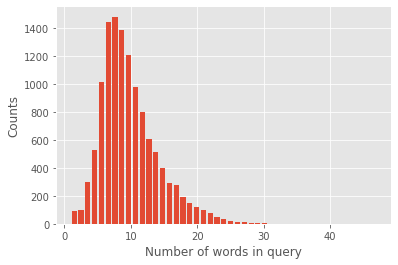

In [ ]:
# sentence length
sent_len = [len(tokens) for tokens in total_tokens]
print(max(sent_len))

import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.xlabel('Number of words in query')
plt.ylabel('Counts')
plt.hist(sent_len,bins=45,rwidth=0.75) #showing discrete number
plt.show # distribution of number of words in a sentence; Train+Test

In [ ]:
pd.Series(sent_len).describe()

count    12218.000000
mean        10.163447
std          4.258822
min          1.000000
25%          7.000000
50%          9.000000
75%         12.000000
max         47.000000
dtype: float64

In [ ]:
len(total_tokens)

12218

In [ ]:
#total_tokens

In [ ]:
df

,words,labels
0,what,O
1,movies,O
2,star,O
3,bruce,B-ACTOR
4,willis,I-ACTOR
...,...,...
124172,movie,O
124173,about,O
124174,captain,B-CHARACTER
124175,jack,I-CHARACTER


In [ ]:
df_try=df.set_index('words').T.to_dict('list')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  """Entry point for launching an IPython kernel.


In [ ]:
df_try

In [ ]:
from collections import OrderedDict
OrderedDict(sorted(df_try.items()))

In [ ]:
df_with_word_length=df
df_with_word_length['word_length']=df_with_word_length['words'].str.len() 
df_with_word_length

,words,labels,word_length
0,what,O,4
1,movies,O,6
2,star,O,4
3,bruce,B-ACTOR,5
4,willis,I-ACTOR,6
...,...,...,...
124172,movie,O,5
124173,about,O,5
124174,captain,B-CHARACTER,7
124175,jack,I-CHARACTER,4


23


<function matplotlib.pyplot.show>

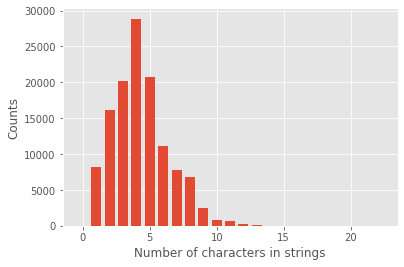

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.xlabel('Number of characters in strings')
plt.ylabel('Counts')
print(max(df_with_word_length['word_length']))
plt.hist(df_with_word_length['word_length'],bins=np.arange(24)-0.5,rwidth=0.75) #showing discrete number
plt.show # distribution of number of characters in a word; Train+Test

In [ ]:
max(df_with_word_length['word_length'])

23

In [ ]:
df_with_word_length[df_with_word_length['word_length']==19]

,words,labels,word_length
23763,inceptioncategories,I-PLOT,19


In [ ]:
df_with_word_length['word_length'].describe()

count    124177.000000
mean          4.337446
std           2.092179
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max          23.000000
Name: word_length, dtype: float64

In [ ]:
df_with_word_length[df_with_word_length['word_length']==max(df_with_word_length['word_length'])]

,words,labels,word_length
105209,happythankyoumoreplease,B-TITLE,23


In [ ]:
tws = [tokens for tokens in total_tokens if len(tokens) < 2]
len(tws), [' '.join(tokes) for tokes in tws]

(36,
 ['tron',
  'hitler',
  'matrix',
  'hitler',
  'maniacts',
  'shopgirl',
  'soapdish',
  'sunrise',
  'intolerance',
  'braveheart',
  'crash',
  'breathless',
  'greed',
  'frankenstein',
  'm',
  'rebecca',
  'amadeus',
  'yojimbo',
  'jaws',
  'titanic',
  'fargo',
  'ikiru',
  'napoleon',
  'shane',
  'aparajito',
  'rocky',
  'diabolique',
  'traffic',
  'chinatown',
  'jfk',
  'goodfellas',
  'scrooge',
  'eraserhead',
  'stagecoach',
  'todd',
  'freaks'])

In [ ]:
[' '.join(tokens) for tokens in total_tokens if len(tokens) > 25]

['a movie that came out in the past three years that has brad renfro in it that centers about family and sibling rivalry that has very good ratings',
 'are there any movies about explosions that starred marilyn monroe in the last three decades that were also rated pg 13 and an average rating of five',
 'can you recall whether there was a 1940 romance directed by derek hoffman that was unrated by the production code but was rated four stars by everyone else',
 'can you remember the title to a pg 13 thriller movie that david arquette played in during the 1980 s that most viewers gave at least an average rating',
 'christian bale appeared in a r rated war movie produced some time in the last decade that my friends thought was all right do you know the title',
 'could you tell me the titles of the pg 13 family films from the past three decades by director david presley that have a ratings average of highly recommended',
 'did annette haywood carter direct a highly recommended movie for chi

In [ ]:
# longest sentence
sents[ np.argmax(sent_len) ]

'im looking for a mockumentary that came out in the 1970 s that was about the filming of a michael shelton style hollywood movie that was the one passion project of his the michael shelton guys career but then audiences generally thought it was just all right'

#### Analysis on Number of Entities

In [ ]:
num_ents = [len([tag for tag in tags if tag != 'O']) for tags in total_labels ]

16


<function matplotlib.pyplot.show>

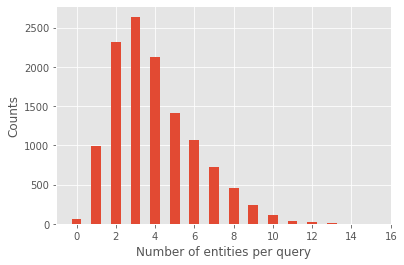

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
print(max(num_ents))
plt.xlabel('Number of entities per query')
plt.ylabel('Counts')
plt.hist(num_ents,bins=np.arange(17)-0.5,rwidth=0.5)
plt.show # distribution of number of entities assigned to same word

In [ ]:
from collections import Counter

len_counts = Counter(num_ents)
len_counts

Counter({0: 66,
         1: 991,
         2: 2320,
         3: 2639,
         4: 2131,
         5: 1416,
         6: 1067,
         7: 724,
         8: 453,
         9: 235,
         10: 106,
         11: 36,
         12: 26,
         13: 5,
         14: 1,
         16: 2})

In [ ]:
pd.Series(num_ents).describe()

count    12218.000000
mean         3.948273
std          2.126038
min          0.000000
25%          2.000000
50%          4.000000
75%          5.000000
max         16.000000
dtype: float64

In [ ]:
list(zip(total_tokens[np.argmax(num_ents)], total_labels[np.argmax(num_ents)]))

[('what', 'B-PLOT'),
 ('movie', 'I-PLOT'),
 ('has', 'I-PLOT'),
 ('the', 'I-PLOT'),
 ('line', 'I-PLOT'),
 ('of', 'I-PLOT'),
 ('dialog', 'I-PLOT'),
 ('i', 'I-PLOT'),
 ('have', 'I-PLOT'),
 ('always', 'I-PLOT'),
 ('relied', 'I-PLOT'),
 ('on', 'I-PLOT'),
 ('the', 'I-PLOT'),
 ('kindness', 'I-PLOT'),
 ('of', 'I-PLOT'),
 ('strangers', 'I-PLOT')]

In [ ]:
specific_count = [idx for idx, len in enumerate(num_ents) if len == 16]

In [ ]:
[list(zip(total_tokens[i], total_labels[i])) for i in specific_count][0:10]

[[('what', 'B-PLOT'),
  ('movie', 'I-PLOT'),
  ('has', 'I-PLOT'),
  ('the', 'I-PLOT'),
  ('line', 'I-PLOT'),
  ('of', 'I-PLOT'),
  ('dialog', 'I-PLOT'),
  ('i', 'I-PLOT'),
  ('have', 'I-PLOT'),
  ('always', 'I-PLOT'),
  ('relied', 'I-PLOT'),
  ('on', 'I-PLOT'),
  ('the', 'I-PLOT'),
  ('kindness', 'I-PLOT'),
  ('of', 'I-PLOT'),
  ('strangers', 'I-PLOT')],
 [('can', 'B-ACTOR'),
  ('you', 'I-ACTOR'),
  ('tell', 'I-ACTOR'),
  ('me', 'I-ACTOR'),
  ('the', 'I-ACTOR'),
  ('name', 'I-ACTOR'),
  ('of', 'I-ACTOR'),
  ('the', 'I-ACTOR'),
  ('movie', 'I-ACTOR'),
  ('that', 'I-ACTOR'),
  ('starred', 'I-ACTOR'),
  ('judy', 'B-ACTOR'),
  ('garland', 'I-ACTOR'),
  ('and', 'O'),
  ('had', 'O'),
  ('the', 'O'),
  ('song', 'O'),
  ('over', 'B-SONG'),
  ('the', 'I-SONG'),
  ('rainbow', 'I-SONG'),
  ('in', 'O'),
  ('it', 'O')]]

Finding duplicates

In [ ]:
import collections
dupes = [(item, count) for item, count in collections.Counter(sents).items() if count > 1]
print('Number of dupes:', len(dupes))
print()
for item, count in dupes:
  print(item, ':', count)

Number of dupes: 59

who directed the shining : 3
find me the movie with the song my heart will go on : 6
ghost rider 2 : 2
who directed avatar : 2
what kind of reviews did the film valentines day receive : 2
which movie from last year has the highest mpaa rating : 2
name a movie starring al pacino known for its famous quotes : 2
did james cameron direct any movies starring robot that were rated r : 2
who directed star wars : 3
name a romantic comedy with josh duhamel that fans loved : 2
i want a preview for a romantic comedy : 2
who directed goodfellas : 3
hitler : 2
show me a demi moore movie from the 1980s : 2
who directed the matrix : 2
find me a trailer for a romantic comedy from this year : 2
who stars in the hunger games : 2
who directed drive : 3
how many star wars films are there : 2
who was the cast of the goonies : 2
show me the harry potter series : 3
what is a recent george clooney movie with high viewers rating : 2
who directed the goonies : 2
what year was pretty woman r

In [ ]:
df.loc[df.words == 'the', 'labels'].unique()

array(['O', 'B-CHARACTER', 'I-TITLE', 'B-TITLE', 'I-SONG', 'I-PLOT',
       'I-YEAR', 'I-RATINGS_AVERAGE', 'I-CHARACTER', 'B-YEAR', 'I-REVIEW',
       'I-ACTOR', 'B-PLOT', 'B-SONG', 'B-REVIEW', 'B-RATINGS_AVERAGE',
       'I-RATING', 'B-ACTOR', 'B-DIRECTOR', 'I-DIRECTOR'], dtype=object)

In [ ]:
word_with_more_than_one_label_check=df.groupby('words').agg(['count','nunique'])
word_with_more_than_one_label_check
word_with_more_than_one_label_check[word_with_more_than_one_label_check['labels']['nunique']!=1]

labels         word_length        
            count nunique       count nunique
words                                        
10             16       4          16       1
11              2       2           2       1
12              5       3           5       1
13            717       6         717       1
17            191       3         191       1
...           ...     ...         ...     ...
za              2       2           2       1
zach            2       2           2       1
zellweiger      2       2           2       1
zombie         18       7          18       1
zombies        12       3          12       1

[2163 rows x 4 columns]

In [ ]:
word_with_more_than_one_label_check['labels']['nunique']

words
,            1
007          1
01           1
04           1
1            1
            ..
zoolander    1
zoom         1
zuccon       1
zwick        1
zydrate      1
Name: nunique, Length: 7481, dtype: int64

In [ ]:
sf=word_with_more_than_one_label_check['labels']['nunique']
df_another_try=pd.DataFrame({'word':sf.index, 'number_of_entities':sf.values})

df_another_try['word_length']=df_another_try['word'].str.len()
df_another_try

,word,number_of_entities,word_length
0,",",1,1
1,007,1,3
2,01,1,2
3,04,1,2
4,1,1,1
...,...,...,...
7476,zoolander,1,9
7477,zoom,1,4
7478,zuccon,1,6
7479,zwick,1,5


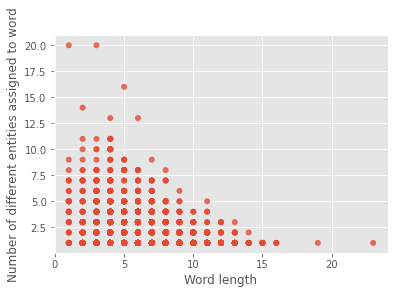

In [ ]:
x = df_another_try.word_length
y = df_another_try.number_of_entities
plt.xlabel('Word length')
plt.ylabel('Number of different entities assigned to word')
plt.scatter(x, y, alpha=0.8, edgecolors='none')

<Figure size 432x216 with 0 Axes>

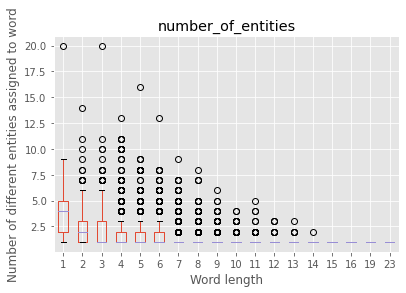

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3))
df_another_try.boxplot(column=['number_of_entities'], by='word_length')
plt.suptitle('')

plt.xlabel('Word length')
plt.ylabel('Number of different entities assigned to word')
plt.xticks(rotation=0)
plt.show()

In [ ]:
word_with_more_than_one_label_check.loc['the']

labels       count      6659
             nunique      20
word_length  count      6659
             nunique       1
Name: the, dtype: int64

In [ ]:
type(word_with_more_than_one_label_check[word_with_more_than_one_label_check['labels']['nunique']!=1])

pandas.core.frame.DataFrame

20


<function matplotlib.pyplot.show>

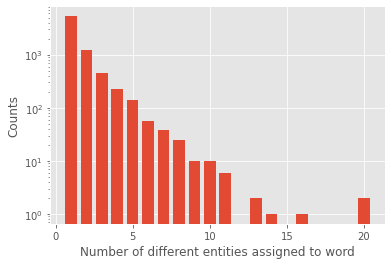

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.xlabel('Number of different entities assigned to word')
plt.ylabel('Counts')
print(max(word_with_more_than_one_label_check['labels']['nunique']))
plt.locator_params(axis='x', integer=True)
plt.yscale('log')
plt.hist(word_with_more_than_one_label_check['labels']['nunique'],bins=np.arange(0,21)+0.5,rwidth=0.75)
plt.show # distribution of number of entities assigned to same word

20


<function matplotlib.pyplot.show>

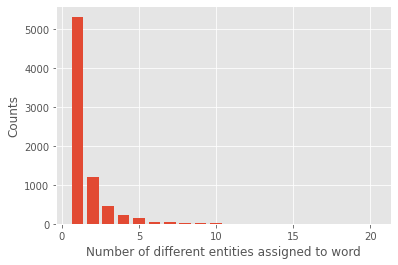

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.xlabel('Number of different entities assigned to word')
plt.ylabel('Counts')
print(max(word_with_more_than_one_label_check['labels']['nunique']))
plt.locator_params(axis='x', integer=True)

plt.hist(word_with_more_than_one_label_check['labels']['nunique'],bins=np.arange(0,21)+0.5,rwidth=0.75)
plt.show # distribution of number of entities assigned to same word

In [ ]:
word_with_more_than_one_label_check['labels']['nunique'].describe()

count    7481.000000
mean        1.578131
std         1.275362
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        20.000000
Name: nunique, dtype: float64

In [ ]:
word_with_more_than_one_label_check[word_with_more_than_one_label_check['labels']['nunique']==20]

labels         word_length        
       count nunique       count nunique
words                                   
a       5240      20        5240       1
the     6659      20        6659       1

Most words have a single entity

In [ ]:
df.loc[df.words == 'zombie', 'labels'].unique()

array(['B-PLOT', 'I-DIRECTOR', 'I-PLOT', 'I-TITLE', 'I-GENRE', 'B-GENRE',
       'B-CHARACTER'], dtype=object)

In [ ]:
theindex = df.loc[((df.words == 'the') & (df.labels != 'O'))].index
theindex

Int64Index([   730,    758,    772,    922,    979,   1175,   1351,   1441,
              1642,   1693,
            ...
            124080, 124085, 124091, 124093, 124096, 124104, 124133, 124139,
            124146, 124150],
           dtype='int64', length=937)

In [ ]:
df.iloc[726:733]

,words,labels,word_length
726,featured,O,8
727,a,O,1
728,character,B-CHARACTER,9
729,called,O,6
730,the,B-CHARACTER,3
731,dude,I-CHARACTER,4
732,are,O,3


In [ ]:
df.iloc[755:760]

,words,labels,word_length
755,original,O,8
756,fast,B-TITLE,4
757,and,I-TITLE,3
758,the,I-TITLE,3
759,furious,I-TITLE,7


In [ ]:
df.iloc[1172:1177]

,words,labels,word_length
1172,how,O,3
1173,many,O,4
1174,friday,B-TITLE,6
1175,the,I-TITLE,3
1176,13th,I-TITLE,4


Can we also get a sentence number?


In [ ]:
dataset_as_df=pd.DataFrame([dataset])

In [ ]:
dataset_as_df

,train_tokens,train_labels,test_tokens,test_labels
0,"[[what, movies, star, bruce, willis], [show, m...","[[O, O, O, B-ACTOR, I-ACTOR], [O, O, O, O, B-A...","[[are, there, any, good, romantic, comedies, o...","[[O, O, O, O, B-GENRE, I-GENRE, O, B-YEAR, I-Y..."


In [ ]:
dataset_as_df['train_tokens']

0    [[what, movies, star, bruce, willis], [show, m...
Name: train_tokens, dtype: object

In [ ]:
dataset_as_df2=dataset_as_df.explode('train_tokens')

In [ ]:
dataset_as_df2=dataset_as_df2.drop(['train_labels','test_tokens','test_labels'], axis=1)

In [ ]:
dataset_as_df2['sentence']=pd.RangeIndex(len(dataset_as_df2.index))
dataset_as_df2

,train_tokens,sentence
0,"[what, movies, star, bruce, willis]",0
0,"[show, me, films, with, drew, barrymore, from,...",1
0,"[what, movies, starred, both, al, pacino, and,...",2
0,"[find, me, all, of, the, movies, that, starred...",3
0,"[find, me, a, movie, with, a, quote, about, ba...",4
...,...,...
0,"[what, did, people, say, about, shadow, of, th...",9770
0,"[show, me, the, reviews, about, road, kill]",9771
0,"[what, do, people, think, of, the, movie, alic...",9772
0,"[show, me, the, movie, with, sherlock, holmes,...",9773


In [ ]:
dataset_as_df3=dataset_as_df.explode('train_labels')

In [ ]:
dataset_as_df3=dataset_as_df3.drop(['train_tokens','test_tokens','test_labels'], axis=1)

In [ ]:
dataset_as_df3['sentence']=pd.RangeIndex(len(dataset_as_df3.index))
dataset_as_df3

,train_labels,sentence
0,"[O, O, O, B-ACTOR, I-ACTOR]",0
0,"[O, O, O, O, B-ACTOR, I-ACTOR, O, O, B-YEAR]",1
0,"[O, O, O, O, B-ACTOR, I-ACTOR, O, B-ACTOR, I-A...",2
0,"[O, O, O, O, O, O, O, O, B-ACTOR, I-ACTOR, O, ...",3
0,"[O, O, O, O, O, O, O, O, O, O, O]",4
...,...,...
0,"[O, O, O, B-REVIEW, I-REVIEW, B-TITLE, I-TITLE...",9770
0,"[O, O, O, B-REVIEW, O, B-TITLE, I-TITLE]",9771
0,"[O, O, O, B-REVIEW, I-REVIEW, O, O, B-TITLE, I...",9772
0,"[O, O, O, O, O, B-CHARACTER, I-CHARACTER, O, O...",9773


In [ ]:
dataset_as_df4=pd.merge(dataset_as_df2,dataset_as_df3, on='sentence')
dataset_as_df4

,train_tokens,sentence,train_labels
0,"[what, movies, star, bruce, willis]",0,"[O, O, O, B-ACTOR, I-ACTOR]"
1,"[show, me, films, with, drew, barrymore, from,...",1,"[O, O, O, O, B-ACTOR, I-ACTOR, O, O, B-YEAR]"
2,"[what, movies, starred, both, al, pacino, and,...",2,"[O, O, O, O, B-ACTOR, I-ACTOR, O, B-ACTOR, I-A..."
3,"[find, me, all, of, the, movies, that, starred...",3,"[O, O, O, O, O, O, O, O, B-ACTOR, I-ACTOR, O, ..."
4,"[find, me, a, movie, with, a, quote, about, ba...",4,"[O, O, O, O, O, O, O, O, O, O, O]"
...,...,...,...
9770,"[what, did, people, say, about, shadow, of, th...",9770,"[O, O, O, B-REVIEW, I-REVIEW, B-TITLE, I-TITLE..."
9771,"[show, me, the, reviews, about, road, kill]",9771,"[O, O, O, B-REVIEW, O, B-TITLE, I-TITLE]"
9772,"[what, do, people, think, of, the, movie, alic...",9772,"[O, O, O, B-REVIEW, I-REVIEW, O, O, B-TITLE, I..."
9773,"[show, me, the, movie, with, sherlock, holmes,...",9773,"[O, O, O, O, O, B-CHARACTER, I-CHARACTER, O, O..."


In [ ]:
cols=dataset_as_df4.columns.tolist()
cols

['train_tokens', 'sentence', 'train_labels']

In [ ]:
dataset_as_df4=dataset_as_df4[['sentence','train_tokens','train_labels']]

dataset_as_df4

,sentence,train_tokens,train_labels
0,0,"[what, movies, star, bruce, willis]","[O, O, O, B-ACTOR, I-ACTOR]"
1,1,"[show, me, films, with, drew, barrymore, from,...","[O, O, O, O, B-ACTOR, I-ACTOR, O, O, B-YEAR]"
2,2,"[what, movies, starred, both, al, pacino, and,...","[O, O, O, O, B-ACTOR, I-ACTOR, O, B-ACTOR, I-A..."
3,3,"[find, me, all, of, the, movies, that, starred...","[O, O, O, O, O, O, O, O, B-ACTOR, I-ACTOR, O, ..."
4,4,"[find, me, a, movie, with, a, quote, about, ba...","[O, O, O, O, O, O, O, O, O, O, O]"
...,...,...,...
9770,9770,"[what, did, people, say, about, shadow, of, th...","[O, O, O, B-REVIEW, I-REVIEW, B-TITLE, I-TITLE..."
9771,9771,"[show, me, the, reviews, about, road, kill]","[O, O, O, B-REVIEW, O, B-TITLE, I-TITLE]"
9772,9772,"[what, do, people, think, of, the, movie, alic...","[O, O, O, B-REVIEW, I-REVIEW, O, O, B-TITLE, I..."
9773,9773,"[show, me, the, movie, with, sherlock, holmes,...","[O, O, O, O, O, B-CHARACTER, I-CHARACTER, O, O..."


In [ ]:
grouped_df=dataset_as_df4.rename(columns={"train_tokens":'words', 'train_labels': 'labels'})
grouped_df

,sentence,words,labels
0,0,"[what, movies, star, bruce, willis]","[O, O, O, B-ACTOR, I-ACTOR]"
1,1,"[show, me, films, with, drew, barrymore, from,...","[O, O, O, O, B-ACTOR, I-ACTOR, O, O, B-YEAR]"
2,2,"[what, movies, starred, both, al, pacino, and,...","[O, O, O, O, B-ACTOR, I-ACTOR, O, B-ACTOR, I-A..."
3,3,"[find, me, all, of, the, movies, that, starred...","[O, O, O, O, O, O, O, O, B-ACTOR, I-ACTOR, O, ..."
4,4,"[find, me, a, movie, with, a, quote, about, ba...","[O, O, O, O, O, O, O, O, O, O, O]"
...,...,...,...
9770,9770,"[what, did, people, say, about, shadow, of, th...","[O, O, O, B-REVIEW, I-REVIEW, B-TITLE, I-TITLE..."
9771,9771,"[show, me, the, reviews, about, road, kill]","[O, O, O, B-REVIEW, O, B-TITLE, I-TITLE]"
9772,9772,"[what, do, people, think, of, the, movie, alic...","[O, O, O, B-REVIEW, I-REVIEW, O, O, B-TITLE, I..."
9773,9773,"[show, me, the, movie, with, sherlock, holmes,...","[O, O, O, O, O, B-CHARACTER, I-CHARACTER, O, O..."


In [ ]:
grouped_df.loc[0,:]

sentence                                      0
words       [what, movies, star, bruce, willis]
labels              [O, O, O, B-ACTOR, I-ACTOR]
Name: 0, dtype: object

In [ ]:
grouped_df.loc[0,'words'][0]

'what'

In [ ]:
grouped_df.loc[0,'labels'][0]

'O'

In [ ]:
list_new=[grouped_df.loc[0,'words'][0],grouped_df.loc[0,'labels'][0]]
list_new

['what', 'O']

There must be a smarter way.
I would like to get something like:
Sentence: 1        [(Thousands, O), (of, O), (demonstrators, O)]
So that we can use the function in Sarkar's book using NER from scratch




The following is interesting but it should do it element by element in each list

In [ ]:
agg_func = lambda s: [(w, t) for w, t in zip(s['words'].values.tolist(),s['labels'].values.tolist())]

In [ ]:
grouped_df2 = grouped_df.groupby('sentence').apply(agg_func)
grouped_df2

sentence
0       [([what, movies, star, bruce, willis], [O, O, ...
1       [([show, me, films, with, drew, barrymore, fro...
2       [([what, movies, starred, both, al, pacino, an...
3       [([find, me, all, of, the, movies, that, starr...
4       [([find, me, a, movie, with, a, quote, about, ...
                              ...                        
9770    [([what, did, people, say, about, shadow, of, ...
9771    [([show, me, the, reviews, about, road, kill],...
9772    [([what, do, people, think, of, the, movie, al...
9773    [([show, me, the, movie, with, sherlock, holme...
9774    [([i, want, to, find, the, movie, with, scarle...
Length: 9775, dtype: object

It looks like that I have to explode those lists

In [ ]:
dataset_as_df5=grouped_df.explode('words')
dataset_as_df5


,sentence,words,labels
0,0,what,"[O, O, O, B-ACTOR, I-ACTOR]"
0,0,movies,"[O, O, O, B-ACTOR, I-ACTOR]"
0,0,star,"[O, O, O, B-ACTOR, I-ACTOR]"
0,0,bruce,"[O, O, O, B-ACTOR, I-ACTOR]"
0,0,willis,"[O, O, O, B-ACTOR, I-ACTOR]"
...,...,...,...
9774,9774,scarlett,"[O, O, O, O, O, O, O, B-CHARACTER, I-CHARACTER..."
9774,9774,o,"[O, O, O, O, O, O, O, B-CHARACTER, I-CHARACTER..."
9774,9774,hara,"[O, O, O, O, O, O, O, B-CHARACTER, I-CHARACTER..."
9774,9774,in,"[O, O, O, O, O, O, O, B-CHARACTER, I-CHARACTER..."


In [ ]:
dataset_as_df5=dataset_as_df5.drop(['labels'], axis=1)
dataset_as_df5

,sentence,words
0,0,what
0,0,movies
0,0,star
0,0,bruce
0,0,willis
...,...,...
9774,9774,scarlett
9774,9774,o
9774,9774,hara
9774,9774,in


In [ ]:
dataset_as_df6=grouped_df.explode('labels')
dataset_as_df6

,sentence,words,labels
0,0,"[what, movies, star, bruce, willis]",O
0,0,"[what, movies, star, bruce, willis]",O
0,0,"[what, movies, star, bruce, willis]",O
0,0,"[what, movies, star, bruce, willis]",B-ACTOR
0,0,"[what, movies, star, bruce, willis]",I-ACTOR
...,...,...,...
9774,9774,"[i, want, to, find, the, movie, with, scarlett...",B-CHARACTER
9774,9774,"[i, want, to, find, the, movie, with, scarlett...",I-CHARACTER
9774,9774,"[i, want, to, find, the, movie, with, scarlett...",I-CHARACTER
9774,9774,"[i, want, to, find, the, movie, with, scarlett...",O


In [ ]:
dataset_as_df6=dataset_as_df6.drop(['words'], axis=1)
dataset_as_df6

,sentence,labels
0,0,O
0,0,O
0,0,O
0,0,B-ACTOR
0,0,I-ACTOR
...,...,...
9774,9774,B-CHARACTER
9774,9774,I-CHARACTER
9774,9774,I-CHARACTER
9774,9774,O


In [ ]:
dataset_as_df7=pd.concat([dataset_as_df5,dataset_as_df6],axis=1).T.drop_duplicates().T
dataset_as_df7

,sentence,words,labels
0,0,what,O
0,0,movies,O
0,0,star,O
0,0,bruce,B-ACTOR
0,0,willis,I-ACTOR
...,...,...,...
9774,9774,scarlett,B-CHARACTER
9774,9774,o,I-CHARACTER
9774,9774,hara,I-CHARACTER
9774,9774,in,O


This looks like the format required for other NER models


It should be in this format:
Sentence #	Word	POS	Tag
with:
Sentence: 1

In [ ]:
dataset_as_df7

,sentence,words,labels
0,0,what,O
0,0,movies,O
0,0,star,O
0,0,bruce,B-ACTOR
0,0,willis,I-ACTOR
...,...,...,...
9774,9774,scarlett,B-CHARACTER
9774,9774,o,I-CHARACTER
9774,9774,hara,I-CHARACTER
9774,9774,in,O


In [ ]:
grouped_df3 = dataset_as_df7.groupby('sentence').apply(agg_func)
grouped_df3

sentence
0       [(what, O), (movies, O), (star, O), (bruce, B-...
1       [(show, O), (me, O), (films, O), (with, O), (d...
2       [(what, O), (movies, O), (starred, O), (both, ...
3       [(find, O), (me, O), (all, O), (of, O), (the, ...
4       [(find, O), (me, O), (a, O), (movie, O), (with...
                              ...                        
9770    [(what, O), (did, O), (people, O), (say, B-REV...
9771    [(show, O), (me, O), (the, O), (reviews, B-REV...
9772    [(what, O), (do, O), (people, O), (think, B-RE...
9773    [(show, O), (me, O), (the, O), (movie, O), (wi...
9774    [(i, O), (want, O), (to, O), (find, O), (the, ...
Length: 9775, dtype: object

That looks like the format required for Sarkar's NER from scratch

Try the same for the test data

In [ ]:
dataset_as_df

,train_tokens,train_labels,test_tokens,test_labels
0,"[[what, movies, star, bruce, willis], [show, m...","[[O, O, O, B-ACTOR, I-ACTOR], [O, O, O, O, B-A...","[[are, there, any, good, romantic, comedies, o...","[[O, O, O, O, B-GENRE, I-GENRE, O, B-YEAR, I-Y..."


In [ ]:
dataset_as_df['test_tokens']

0    [[are, there, any, good, romantic, comedies, o...
Name: test_tokens, dtype: object

In [ ]:
dataset_as_df['test_tokens']
dataset_as_df22=dataset_as_df.explode('test_tokens')
dataset_as_df22=dataset_as_df22.drop(['train_tokens','train_labels','test_labels'], axis=1)
dataset_as_df22['sentence']=pd.RangeIndex(len(dataset_as_df22.index))
dataset_as_df22
dataset_as_df23=dataset_as_df.explode('test_labels')
dataset_as_df23=dataset_as_df23.drop(['train_tokens','train_labels','test_tokens'], axis=1)
dataset_as_df23['sentence']=pd.RangeIndex(len(dataset_as_df23.index))
dataset_as_df23


,test_labels,sentence
0,"[O, O, O, O, B-GENRE, I-GENRE, O, B-YEAR, I-YEAR]",0
0,"[O, O, O, O, O, B-PLOT, I-PLOT, I-PLOT]",1
0,"[O, O, B-RATINGS_AVERAGE, I-RATINGS_AVERAGE, O...",2
0,"[O, B-GENRE, I-GENRE, O, O, O, O, B-YEAR]",3
0,"[O, O, O, O, O, O, O, O, B-TITLE, I-TITLE, O]",4
...,...,...
0,"[O, O, B-TRAILER, B-TITLE, I-TITLE, I-TITLE, I...",2438
0,"[O, O, B-TITLE, I-TITLE, I-TITLE, B-REVIEW]",2439
0,"[O, B-CHARACTER, I-CHARACTER, O]",2440
0,"[O, O, O, B-GENRE, O, O, B-CHARACTER, I-CHARAC...",2441


In [ ]:
dataset_as_df22

,test_tokens,sentence
0,"[are, there, any, good, romantic, comedies, ou...",0
0,"[show, me, a, movie, about, cars, that, talk]",1
0,"[list, the, five, star, rated, movies, starrin...",2
0,"[what, science, fiction, films, have, come, ou...",3
0,"[did, the, same, director, make, all, of, the,...",4
...,...,...
0,"[play, the, trailer, dark, of, the, moon]",2438
0,"[show, me, the, good, thief, review]",2439
0,"[any, james, bond, movies]",2440
0,"[find, me, some, adventure, movies, with, indi...",2441


In [ ]:
dataset_as_df24=pd.merge(dataset_as_df22,dataset_as_df23, on='sentence')
dataset_as_df24
cols=dataset_as_df24.columns.tolist()
cols
dataset_as_df24=dataset_as_df24[['sentence','test_tokens','test_labels']]
dataset_as_df24
grouped_df22=dataset_as_df24.rename(columns={"test_tokens":'words', 'test_labels': 'labels'})
grouped_df22


,sentence,words,labels
0,0,"[are, there, any, good, romantic, comedies, ou...","[O, O, O, O, B-GENRE, I-GENRE, O, B-YEAR, I-YEAR]"
1,1,"[show, me, a, movie, about, cars, that, talk]","[O, O, O, O, O, B-PLOT, I-PLOT, I-PLOT]"
2,2,"[list, the, five, star, rated, movies, starrin...","[O, O, B-RATINGS_AVERAGE, I-RATINGS_AVERAGE, O..."
3,3,"[what, science, fiction, films, have, come, ou...","[O, B-GENRE, I-GENRE, O, O, O, O, B-YEAR]"
4,4,"[did, the, same, director, make, all, of, the,...","[O, O, O, O, O, O, O, O, B-TITLE, I-TITLE, O]"
...,...,...,...
2438,2438,"[play, the, trailer, dark, of, the, moon]","[O, O, B-TRAILER, B-TITLE, I-TITLE, I-TITLE, I..."
2439,2439,"[show, me, the, good, thief, review]","[O, O, B-TITLE, I-TITLE, I-TITLE, B-REVIEW]"
2440,2440,"[any, james, bond, movies]","[O, B-CHARACTER, I-CHARACTER, O]"
2441,2441,"[find, me, some, adventure, movies, with, indi...","[O, O, O, B-GENRE, O, O, B-CHARACTER, I-CHARAC..."


In [ ]:
dataset_as_df25=grouped_df22.explode('words')
dataset_as_df25
dataset_as_df25=dataset_as_df25.drop(['labels'], axis=1)
dataset_as_df25
dataset_as_df26=grouped_df22.explode('labels')
dataset_as_df26
dataset_as_df26=dataset_as_df26.drop(['words'], axis=1)
dataset_as_df26


,sentence,labels
0,0,O
0,0,O
0,0,O
0,0,O
0,0,B-GENRE
...,...,...
2442,2442,O
2442,2442,O
2442,2442,B-CHARACTER
2442,2442,I-CHARACTER


In [ ]:
dataset_as_df25

,sentence,words
0,0,are
0,0,there
0,0,any
0,0,good
0,0,romantic
...,...,...
2442,2442,movie
2442,2442,about
2442,2442,captain
2442,2442,jack


In [ ]:
dataset_as_df27=pd.concat([dataset_as_df25,dataset_as_df26],axis=1).T.drop_duplicates().T
dataset_as_df27
grouped_df23 = dataset_as_df27.groupby('sentence').apply(agg_func)
grouped_df23 # test set in right format

sentence
0       [(are, O), (there, O), (any, O), (good, O), (r...
1       [(show, O), (me, O), (a, O), (movie, O), (abou...
2       [(list, O), (the, O), (five, B-RATINGS_AVERAGE...
3       [(what, O), (science, B-GENRE), (fiction, I-GE...
4       [(did, O), (the, O), (same, O), (director, O),...
                              ...                        
2438    [(play, O), (the, O), (trailer, B-TRAILER), (d...
2439    [(show, O), (me, O), (the, B-TITLE), (good, I-...
2440    [(any, O), (james, B-CHARACTER), (bond, I-CHAR...
2441    [(find, O), (me, O), (some, O), (adventure, B-...
2442    [(what, O), (s, O), (the, O), (title, O), (of,...
Length: 2443, dtype: object

In [ ]:
sentences2=[s for s in grouped_df23]

In [ ]:
#sentences2

In [ ]:
dataset_as_df7

,sentence,words,labels
0,0,what,O
0,0,movies,O
0,0,star,O
0,0,bruce,B-ACTOR
0,0,willis,I-ACTOR
...,...,...,...
9774,9774,scarlett,B-CHARACTER
9774,9774,o,I-CHARACTER
9774,9774,hara,I-CHARACTER
9774,9774,in,O


In [ ]:
max(dataset_as_df7['sentence'])

9774

In [ ]:
dataset_as_df27

,sentence,words,labels
0,0,are,O
0,0,there,O
0,0,any,O
0,0,good,O
0,0,romantic,B-GENRE
...,...,...,...
2442,2442,movie,O
2442,2442,about,O
2442,2442,captain,B-CHARACTER
2442,2442,jack,I-CHARACTER


In [ ]:
dataset_as_df27['sentence']=dataset_as_df27['sentence']+max(dataset_as_df7['sentence'])+1
dataset_as_df27

,sentence,words,labels
0,9775,are,O
0,9775,there,O
0,9775,any,O
0,9775,good,O
0,9775,romantic,B-GENRE
...,...,...,...
2442,12217,movie,O
2442,12217,about,O
2442,12217,captain,B-CHARACTER
2442,12217,jack,I-CHARACTER


In [ ]:
dataset_as_df7_df27_concat=pd.concat([dataset_as_df7,dataset_as_df27], ignore_index=True)
dataset_as_df7_df27_concat

,sentence,words,labels
0,0,what,O
1,0,movies,O
2,0,star,O
3,0,bruce,B-ACTOR
4,0,willis,I-ACTOR
...,...,...,...
124172,12217,movie,O
124173,12217,about,O
124174,12217,captain,B-CHARACTER
124175,12217,jack,I-CHARACTER


In [ ]:
dataset_for_other_NER=dataset_as_df7_df27_concat
#new=dataset_for_other_NER['sentence']
dataset_for_other_NER['Sentence #']='Sentence: '
dataset_for_other_NER['Sentence #']=dataset_for_other_NER['Sentence #']+dataset_for_other_NER['sentence'].astype(str)
dataset_for_other_NER['POS']='Not'
#mapping={"sentence": "sentence","words": "Word", "labels":"Tag", "Sentence #": "Sentence #", "POS": "POS"}
dataset_for_other_NER.columns=["sentence","Word","Tag", "Sentence #","POS"]
dataset_for_other_NER=dataset_for_other_NER[["Sentence #",'Word','POS','Tag']]
dataset_for_other_NER

,Sentence #,Word,POS,Tag
0,Sentence: 0,what,Not,O
1,Sentence: 0,movies,Not,O
2,Sentence: 0,star,Not,O
3,Sentence: 0,bruce,Not,B-ACTOR
4,Sentence: 0,willis,Not,I-ACTOR
...,...,...,...,...
124172,Sentence: 12217,movie,Not,O
124173,Sentence: 12217,about,Not,O
124174,Sentence: 12217,captain,Not,B-CHARACTER
124175,Sentence: 12217,jack,Not,I-CHARACTER


In [ ]:
len(dataset_for_other_NER)

124177

In [ ]:
dataset_for_other_NER.to_csv('/content/drive/My Drive/DAAN888/data/test_format_for_other_NER.csv')

In [ ]:
len(sentences2[0])

9

In [ ]:
len(sentences2[1])

8

In [ ]:
type(sentences2)

list

In [ ]:
len(sentences2)

2443

<function matplotlib.pyplot.show>

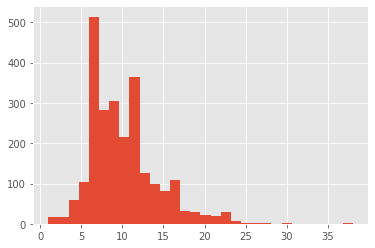

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.hist([len(w) for w in sentences2],bins=30)
plt.show # distribution of number of words in a sentence; This is only test dataset?

In [ ]:
sentences=[s for s in grouped_df3]
sentences[0]

[('what', 'O'),
 ('movies', 'O'),
 ('star', 'O'),
 ('bruce', 'B-ACTOR'),
 ('willis', 'I-ACTOR')]

In [ ]:
sentences

[[('what', 'O'),
  ('movies', 'O'),
  ('star', 'O'),
  ('bruce', 'B-ACTOR'),
  ('willis', 'I-ACTOR')],
 [('show', 'O'),
  ('me', 'O'),
  ('films', 'O'),
  ('with', 'O'),
  ('drew', 'B-ACTOR'),
  ('barrymore', 'I-ACTOR'),
  ('from', 'O'),
  ('the', 'O'),
  ('1980s', 'B-YEAR')],
 [('what', 'O'),
  ('movies', 'O'),
  ('starred', 'O'),
  ('both', 'O'),
  ('al', 'B-ACTOR'),
  ('pacino', 'I-ACTOR'),
  ('and', 'O'),
  ('robert', 'B-ACTOR'),
  ('deniro', 'I-ACTOR')],
 [('find', 'O'),
  ('me', 'O'),
  ('all', 'O'),
  ('of', 'O'),
  ('the', 'O'),
  ('movies', 'O'),
  ('that', 'O'),
  ('starred', 'O'),
  ('harold', 'B-ACTOR'),
  ('ramis', 'I-ACTOR'),
  ('and', 'O'),
  ('bill', 'B-ACTOR'),
  ('murray', 'I-ACTOR')],
 [('find', 'O'),
  ('me', 'O'),
  ('a', 'O'),
  ('movie', 'O'),
  ('with', 'O'),
  ('a', 'O'),
  ('quote', 'O'),
  ('about', 'O'),
  ('baseball', 'O'),
  ('in', 'O'),
  ('it', 'O')],
 [('what', 'O'),
  ('movies', 'O'),
  ('have', 'O'),
  ('mississippi', 'B-TITLE'),
  ('in', 'O'),
  ('th

In [ ]:
joinedsentences=sentences+sentences2

In [ ]:
len(joinedsentences)

12218

Discrete values

47


<function matplotlib.pyplot.show>

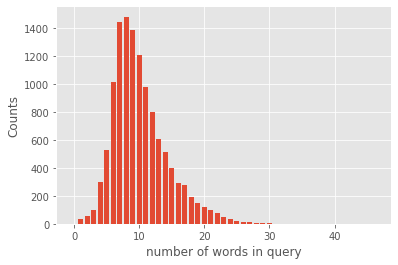

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
print(max(len(w) for w in joinedsentences))
plt.hist([len(w) for w in joinedsentences],bins=np.arange(48)-0.5,rwidth=0.75)
plt.xlabel('number of words in query')
plt.ylabel('Counts')
plt.show # distribution of number of words in a sentence; all data so train and test

47


<function matplotlib.pyplot.show>

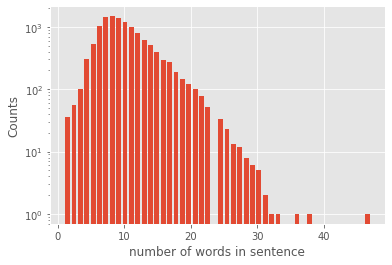

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
print(max(len(w) for w in joinedsentences))
plt.xlabel('number of words in sentence')
plt.ylabel('Counts')
plt.yscale('log',nonposy='clip')
plt.hist([len(w) for w in joinedsentences],bins=48,rwidth=0.75)
plt.show # distribution of number of words in a sentence; all data so train and test

In [ ]:
len(sentences)

9775

In [ ]:
len(max(joinedsentences, key=len))


47

In [ ]:
max(joinedsentences, key=len)

[('im', 'O'),
 ('looking', 'O'),
 ('for', 'O'),
 ('a', 'O'),
 ('mockumentary', 'B-GENRE'),
 ('that', 'O'),
 ('came', 'O'),
 ('out', 'O'),
 ('in', 'O'),
 ('the', 'O'),
 ('1970', 'B-YEAR'),
 ('s', 'I-YEAR'),
 ('that', 'O'),
 ('was', 'O'),
 ('about', 'O'),
 ('the', 'O'),
 ('filming', 'O'),
 ('of', 'O'),
 ('a', 'O'),
 ('michael', 'B-DIRECTOR'),
 ('shelton', 'I-DIRECTOR'),
 ('style', 'O'),
 ('hollywood', 'O'),
 ('movie', 'O'),
 ('that', 'O'),
 ('was', 'O'),
 ('the', 'O'),
 ('one', 'O'),
 ('passion', 'O'),
 ('project', 'O'),
 ('of', 'O'),
 ('his', 'O'),
 ('the', 'O'),
 ('michael', 'O'),
 ('shelton', 'O'),
 ('guys', 'O'),
 ('career', 'O'),
 ('but', 'O'),
 ('then', 'O'),
 ('audiences', 'O'),
 ('generally', 'O'),
 ('thought', 'O'),
 ('it', 'O'),
 ('was', 'O'),
 ('just', 'O'),
 ('all', 'B-RATINGS_AVERAGE'),
 ('right', 'I-RATINGS_AVERAGE')]

In [ ]:
min(joinedsentences, key=len)

[('tron', 'B-TITLE')]

In [ ]:
sents

['what movies star bruce willis',
 'show me films with drew barrymore from the 1980s',
 'what movies starred both al pacino and robert deniro',
 'find me all of the movies that starred harold ramis and bill murray',
 'find me a movie with a quote about baseball in it',
 'what movies have mississippi in the title',
 'show me science fiction films directed by steven spielberg',
 'do you have any thrillers directed by sofia coppola',
 'what leonard cohen songs have been used in a movie',
 'show me films elvis films set in hawaii',
 'what movie is references zydrate',
 'are there any musical films with patrick dempsey',
 'list westerns starring john wayne',
 'show me military related movies with demi moore',
 'did stephen made any sex or horror movie that must be have to watch',
 'did ang lee direct a costume drama movie set in the 1800s',
 'who directed the first james bond movies',
 'list the r rated best picture oscar winners',
 'where can i buy the sucker punch soundtrack',
 'what brit

In [ ]:
df_sentence_length=pd.DataFrame(sents,columns=['sentence'])
df_sentence_length['word_count']=df_sentence_length['sentence'].str.split().map(len)
df_sentence_length=df_sentence_length.sort_values(by=['word_count'], ascending=False)
pd.options.display.max_colwidth=200
df_sentence_length

,sentence,word_count
5523,im looking for a mockumentary that came out in the 1970 s that was about the filming of a michael shelton style hollywood movie that was the one passion project of his the michael shelton guys car...,47
10893,can you tell me the name of a movie i saw in the late 90 s that was set in a futuristic utopia and it was rated r and the director was i think something like steve stamatiadis,38
6296,is there any possible way garth jennings could somehow have shoehorned a mob subplot into his 2005 film adaptation of the hitchhikers guide to the galaxy and yet earned two thumbs up from the aver...,36
9341,would you be able to show me where i can find a pg rated crime move made in the year 2000 which was directed by cedric gibbons that has a rating of six,33
8557,what is the title of the movie that was rated nc 17 it had a child with a barbie doll in it it was liked a lot in the past ten decades,32
...,...,...
9993,todd,1
9735,jfk,1
9675,m,1
9719,rocky,1


In [ ]:
df_sentence_length[0:10]

,sentence,word_count
5523,im looking for a mockumentary that came out in the 1970 s that was about the filming of a michael shelton style hollywood movie that was the one passion project of his the michael shelton guys car...,47
10893,can you tell me the name of a movie i saw in the late 90 s that was set in a futuristic utopia and it was rated r and the director was i think something like steve stamatiadis,38
6296,is there any possible way garth jennings could somehow have shoehorned a mob subplot into his 2005 film adaptation of the hitchhikers guide to the galaxy and yet earned two thumbs up from the aver...,36
9341,would you be able to show me where i can find a pg rated crime move made in the year 2000 which was directed by cedric gibbons that has a rating of six,33
8557,what is the title of the movie that was rated nc 17 it had a child with a barbie doll in it it was liked a lot in the past ten decades,32
5749,in the year 2000 david keith directed a really good adventure pg 13 movie where the plot centers around someone being released from jail what is the name of the movie,31
5300,i cant remember the name of a movie but it was a highly rated crime drama from the 1990 s starring brad pitt can you tell me what the title was,31
7118,the name of the nc 17 movie that joe pesci starred in where he was known for in the last eight years it had combat and was liked a lot,30
11985,what was that movie that had a ratings average of four and rated nc 17 that came out in the last ten decades about a composer which luca guadagnino directed,30
5452,id like to find a movie with at least average ratings with actor lee majors that was made in the 1950 s and is a political movie about holy power,30


NameError: ignored

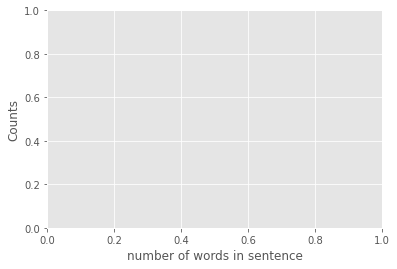

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.xlabel('number of words in sentence')
plt.ylabel('Counts')
print(max(df_sentence_length['word_count']))

plt.hist(df_sentence_length['word_count'],bins=48,rwidth=0.75)
plt.show # distribution of number of words in a sentence; all data so train and test


[3.600e+01 0.000e+00 5.600e+01 0.000e+00 1.010e+02 0.000e+00 3.000e+02
 0.000e+00 5.270e+02 0.000e+00 1.016e+03 0.000e+00 0.000e+00 1.441e+03
 0.000e+00 1.482e+03 0.000e+00 1.387e+03 0.000e+00 1.209e+03 0.000e+00
 9.810e+02 0.000e+00 7.970e+02 0.000e+00 0.000e+00 6.090e+02 0.000e+00
 5.150e+02 0.000e+00 3.980e+02 0.000e+00 2.910e+02 0.000e+00 2.780e+02
 0.000e+00 1.920e+02 0.000e+00 0.000e+00 1.460e+02 0.000e+00 1.200e+02
 0.000e+00 1.000e+02 0.000e+00 7.700e+01 0.000e+00 5.200e+01 0.000e+00
 0.000e+00 3.300e+01 0.000e+00 2.300e+01 0.000e+00 1.300e+01 0.000e+00
 1.200e+01 0.000e+00 8.000e+00 0.000e+00 6.000e+00 0.000e+00 0.000e+00
 5.000e+00 0.000e+00 2.000e+00 0.000e+00 1.000e+00 0.000e+00 1.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00
 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000

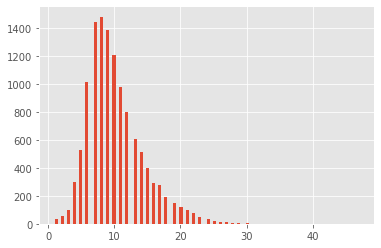

In [ ]:
(n,bins,patches)=plt.hist(df_sentence_length['word_count'],bins=100)
print(n,bins)

Summary statistics on number of words in sentence

In [ ]:
df_sentence_length['word_count'].describe()

count    12218.000000
mean        10.163447
std          4.258822
min          1.000000
25%          7.000000
50%          9.000000
75%         12.000000
max         47.000000
Name: word_count, dtype: float64

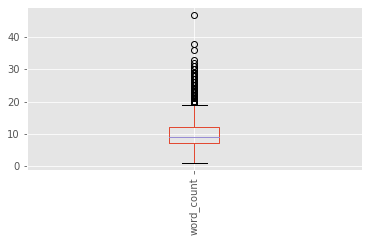

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3))
df_sentence_length.boxplot(column=['word_count'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
pd.options.display.max_colwidth=200
df_sentence_length[df_sentence_length['word_count']==38]

,sentence,word_count
10893,can you tell me the name of a movie i saw in the late 90 s that was set in a futuristic utopia and it was rated r and the director was i think something like steve stamatiadis,38


In [ ]:
pd.set_option('display.max_rows',350)
df_sentence_length[df_sentence_length['word_count']>20]

,sentence,word_count
5523,im looking for a mockumentary that came out in the 1970 s that was about the filming of a michael shelton style hollywood movie that was the one passion project of his the michael shelton guys car...,47
10893,can you tell me the name of a movie i saw in the late 90 s that was set in a futuristic utopia and it was rated r and the director was i think something like steve stamatiadis,38
6296,is there any possible way garth jennings could somehow have shoehorned a mob subplot into his 2005 film adaptation of the hitchhikers guide to the galaxy and yet earned two thumbs up from the aver...,36
9341,would you be able to show me where i can find a pg rated crime move made in the year 2000 which was directed by cedric gibbons that has a rating of six,33
8557,what is the title of the movie that was rated nc 17 it had a child with a barbie doll in it it was liked a lot in the past ten decades,32
5749,in the year 2000 david keith directed a really good adventure pg 13 movie where the plot centers around someone being released from jail what is the name of the movie,31
5300,i cant remember the name of a movie but it was a highly rated crime drama from the 1990 s starring brad pitt can you tell me what the title was,31
7118,the name of the nc 17 movie that joe pesci starred in where he was known for in the last eight years it had combat and was liked a lot,30
11985,what was that movie that had a ratings average of four and rated nc 17 that came out in the last ten decades about a composer which luca guadagnino directed,30
5452,id like to find a movie with at least average ratings with actor lee majors that was made in the 1950 s and is a political movie about holy power,30


In [ ]:
#df_sentence_length[df_sentence_length['sentence'].str.contains('.')]

In [ ]:
df_sentence_length.iloc[10893,0]

'who directed butterfly on a wheel'

In [ ]:
df_sentence_length[-30:]

,sentence,word_count
9712,napoleon,1
9721,diabolique,1
9691,jaws,1
9686,amadeus,1
9737,goodfellas,1
9668,greed,1
9738,scrooge,1
9689,yojimbo,1
9670,frankenstein,1
9739,eraserhead,1


In [ ]:
len(df_sentence_length[df_sentence_length['word_count']==1])

36

In [ ]:
def word2features(sent, i):
    word = sent[i][0]
#    postag = sent[i][1]

    features = {
        'bias': 1.0,
        'word.lower()': word.lower(),
        'word[-3:]': word[-3:],
        'word[-2:]': word[-2:],
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
#        'postag': postag,
#        'postag[:2]': postag[:2],
    }
    if i > 0:
        word1 = sent[i-1][0]
        postag1 = sent[i-1][1]
        features.update({
            '-1:word.lower()': word1.lower(),
            '-1:word.istitle()': word1.istitle(),
            '-1:word.isupper()': word1.isupper(),
#            '-1:postag': postag1,
#            '-1:postag[:2]': postag1[:2],
        })
    else:
        features['BOS'] = True

    if i < len(sent)-1:
        word1 = sent[i+1][0]
        postag1 = sent[i+1][1]
        features.update({
            '+1:word.lower()': word1.lower(),
            '+1:word.istitle()': word1.istitle(),
            '+1:word.isupper()': word1.isupper(),
#            '+1:postag': postag1,
#            '+1:postag[:2]': postag1[:2],
        })
    else:
        features['EOS'] = True

    return features


def sent2features(sent):
    return [word2features(sent, i) for i in range(len(sent))]

#def sent2labels(sent):
#    return [label for token, postag, label in sent]

def sent2labels(sent):
    return [label for token, label in sent]

In [ ]:
sentences=[s for s in grouped_df3]
sentences[0]

[('what', 'O'),
 ('movies', 'O'),
 ('star', 'O'),
 ('bruce', 'B-ACTOR'),
 ('willis', 'I-ACTOR')]

What I like about is that it gives us control over engineering our own features:

In [ ]:
sent2features(sentences[0][0:5])

[{'+1:word.istitle()': False,
  '+1:word.isupper()': False,
  '+1:word.lower()': 'movies',
  'BOS': True,
  'bias': 1.0,
  'word.isdigit()': False,
  'word.istitle()': False,
  'word.isupper()': False,
  'word.lower()': 'what',
  'word[-2:]': 'at',
  'word[-3:]': 'hat'},
 {'+1:word.istitle()': False,
  '+1:word.isupper()': False,
  '+1:word.lower()': 'star',
  '-1:word.istitle()': False,
  '-1:word.isupper()': False,
  '-1:word.lower()': 'what',
  'bias': 1.0,
  'word.isdigit()': False,
  'word.istitle()': False,
  'word.isupper()': False,
  'word.lower()': 'movies',
  'word[-2:]': 'es',
  'word[-3:]': 'ies'},
 {'+1:word.istitle()': False,
  '+1:word.isupper()': False,
  '+1:word.lower()': 'bruce',
  '-1:word.istitle()': False,
  '-1:word.isupper()': False,
  '-1:word.lower()': 'movies',
  'bias': 1.0,
  'word.isdigit()': False,
  'word.istitle()': False,
  'word.isupper()': False,
  'word.lower()': 'star',
  'word[-2:]': 'ar',
  'word[-3:]': 'tar'},
 {'+1:word.istitle()': False,
  '+1

In [ ]:
sent2labels(sentences[0][0:5])

['O', 'O', 'O', 'B-ACTOR', 'I-ACTOR']

Change so that we can use the actual train and test data

In [ ]:
import numpy as np

X_train=np.array([sent2features(s) for s in sentences])
X_test=np.array([sent2features(s) for s in sentences2])
y_train=np.array([sent2labels(s) for s in sentences])
y_test=np.array([sent2labels(s) for s in sentences2])

X_train.shape, X_test.shape

((9775,), (2443,))

In [ ]:
X_train[0]

[{'+1:word.istitle()': False,
  '+1:word.isupper()': False,
  '+1:word.lower()': 'movies',
  'BOS': True,
  'bias': 1.0,
  'word.isdigit()': False,
  'word.istitle()': False,
  'word.isupper()': False,
  'word.lower()': 'what',
  'word[-2:]': 'at',
  'word[-3:]': 'hat'},
 {'+1:word.istitle()': False,
  '+1:word.isupper()': False,
  '+1:word.lower()': 'star',
  '-1:word.istitle()': False,
  '-1:word.isupper()': False,
  '-1:word.lower()': 'what',
  'bias': 1.0,
  'word.isdigit()': False,
  'word.istitle()': False,
  'word.isupper()': False,
  'word.lower()': 'movies',
  'word[-2:]': 'es',
  'word[-3:]': 'ies'},
 {'+1:word.istitle()': False,
  '+1:word.isupper()': False,
  '+1:word.lower()': 'bruce',
  '-1:word.istitle()': False,
  '-1:word.isupper()': False,
  '-1:word.lower()': 'movies',
  'bias': 1.0,
  'word.isdigit()': False,
  'word.istitle()': False,
  'word.isupper()': False,
  'word.lower()': 'star',
  'word[-2:]': 'ar',
  'word[-3:]': 'tar'},
 {'+1:word.istitle()': False,
  '+1

In [ ]:

#from sklearn.model_selection import train_test_split
#import numpy as np

#X = np.array([sent2features(s) for s in sentences])
#y = np.array([sent2labels(s) for s in sentences])

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
#X_train.shape, X_test.shape

In [ ]:
!pip install sklearn-crfsuite




     |████████████████████████████████| 747kB 3.9MB/s 


In [ ]:
import sklearn_crfsuite
crf = sklearn_crfsuite.CRF(algorithm='lbfgs',
                           c1=0.1,
                           c2=0.1,
                           max_iterations=100,
                           all_possible_transitions=True,
                           verbose=True)

In [ ]:
crf.fit(X_train, y_train)

loading training data to CRFsuite: 100%|██████████| 9775/9775 [00:00<00:00, 11289.91it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 39593
Seconds required: 0.176

L-BFGS optimization
c1: 0.100000
c2: 0.100000
num_memories: 6
max_iterations: 100
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=0.60  loss=248065.78 active=39005 feature_norm=1.00
Iter 2   time=1.30  loss=177667.20 active=38769 feature_norm=2.67
Iter 3   time=0.31  loss=173467.22 active=37761 feature_norm=2.49
Iter 4   time=0.31  loss=166872.47 active=38626 feature_norm=2.75
Iter 5   time=0.31  loss=119607.30 active=38593 feature_norm=8.66
Iter 6   time=0.32  loss=97207.15 active=38886 feature_norm=13.35
Iter 7   time=0.32  loss=85319.34 active=39109 feature_norm=13.75
Iter 8   time=0.32  loss=76135.53 active=39190 feature_norm=15.41
Iter 9   time=0.33  loss=69178.11 active=38775 feature_norm=20.58
Iter 

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


CRF(algorithm='lbfgs', all_possible_states=None, all_possible_transitions=True,
    averaging=None, c=None, c1=0.1, c2=0.1, calibration_candidates=None,
    calibration_eta=None, calibration_max_trials=None, calibration_rate=None,
    calibration_samples=None, delta=None, epsilon=None, error_sensitive=None,
    gamma=None, keep_tempfiles=None, linesearch=None, max_iterations=100,
    max_linesearch=None, min_freq=None, model_filename=None, num_memories=None,
    pa_type=None, period=None, trainer_cls=None, variance=None, verbose=True)

In [ ]:
y_pred = crf.predict(X_test)
print(y_pred[0])

['O', 'O', 'O', 'O', 'B-GENRE', 'I-GENRE', 'O', 'O', 'O']


In [ ]:
print(y_test[0])

['O', 'O', 'O', 'O', 'B-GENRE', 'I-GENRE', 'O', 'B-YEAR', 'I-YEAR']


In [ ]:
from sklearn_crfsuite import metrics
print(metrics.flat_classification_report(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                   precision    recall  f1-score   support

          B-ACTOR       0.90      0.93      0.91       812
      B-CHARACTER       0.70      0.53      0.60        90
       B-DIRECTOR       0.91      0.84      0.87       456
          B-GENRE       0.93      0.95      0.94      1117
           B-PLOT       0.68      0.64      0.66       491
         B-RATING       0.98      0.97      0.97       500
B-RATINGS_AVERAGE       0.93      0.87      0.90       451
         B-REVIEW       0.38      0.14      0.21        56
           B-SONG       0.68      0.52      0.59        54
          B-TITLE       0.77      0.79      0.78       562
        B-TRAILER       0.81      0.83      0.82        30
           B-YEAR       0.95      0.94      0.95       720
          I-ACTOR       0.88      0.92      0.90       862
      I-CHARACTER       0.66      0.44      0.53        75
       I-DIRECTOR       0.90      0.84      0.87       496
          I-GENRE       0.82      0.70      0.76       

In [ ]:
!pip install eli5

     |████████████████████████████████| 112kB 2.7MB/s 


In [ ]:
import eli5

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
eli5.show_weights(crf, top=10)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


From \ To,O,B-ACTOR,I-ACTOR,B-CHARACTER,I-CHARACTER,B-DIRECTOR,I-DIRECTOR,B-GENRE,I-GENRE,B-PLOT,I-PLOT,B-RATING,I-RATING,B-RATINGS_AVERAGE,I-RATINGS_AVERAGE,B-REVIEW,I-REVIEW,B-SONG,I-SONG,B-TITLE,I-TITLE,B-TRAILER,I-TRAILER,B-YEAR,I-YEAR
O,3.243,2.93,-4.396,2.311,-3.664,2.667,-3.553,1.838,-3.61,2.221,-5.777,1.811,-3.712,2.417,-4.889,1.445,-3.064,1.674,-3.413,2.493,-5.025,1.275,-1.535,1.938,-4.495
B-ACTOR,1.045,-1.844,8.937,-0.087,-0.233,-0.102,-0.81,-0.399,0.0,-0.789,-0.914,-0.211,0.0,-0.218,-0.373,-0.071,0.0,0.0,0.0,-0.689,-0.969,0.0,0.0,-0.03,0.0
I-ACTOR,1.18,-0.877,5.075,0.0,-1.056,-0.776,-1.411,1.313,-0.947,1.17,-2.597,0.919,-0.821,0.545,-2.064,0.346,-1.0,-0.06,-1.049,-1.289,-2.014,0.0,-0.138,1.091,-1.115
B-CHARACTER,0.353,-0.84,-0.313,-0.65,6.594,-0.086,-0.296,-1.346,-0.002,0.552,-1.032,-0.417,0.0,-0.251,-0.19,-0.047,0.0,-0.064,-0.006,0.188,-1.161,0.0,0.0,-0.211,-0.033
I-CHARACTER,0.384,0.006,-0.264,-0.853,5.84,0.0,-0.094,-0.274,0.0,0.521,-1.117,-0.302,0.0,-0.077,-0.265,-0.198,0.0,-0.142,0.0,-1.076,-1.386,-0.025,0.0,-0.513,-0.163
B-DIRECTOR,0.121,-1.139,-1.335,-0.424,-0.544,-2.283,7.392,-0.845,-0.201,-0.379,-1.27,-0.906,-0.412,-0.638,-0.459,-0.454,-0.482,-0.486,-0.484,-0.229,-1.268,-0.124,0.0,-0.282,-0.28
I-DIRECTOR,1.43,-0.674,-0.825,-0.179,-0.362,-0.446,5.318,1.691,-0.219,0.534,-1.213,0.481,-0.389,0.534,-1.014,0.319,-0.446,-0.304,-0.296,-0.195,-1.18,-0.022,0.0,1.243,-0.341
B-GENRE,1.341,0.303,-0.866,-0.392,-0.645,0.798,-1.108,-4.65,5.623,1.389,-1.879,0.636,-0.891,1.237,-1.353,-0.939,-0.723,-0.529,-0.492,-0.989,-1.723,-1.613,0.0,0.997,-0.666
I-GENRE,0.861,-0.557,-0.901,-0.163,-0.176,0.129,-0.635,-2.434,5.674,0.172,-1.524,-0.085,-0.595,0.022,-0.819,-0.277,-0.124,-0.0,-0.154,0.001,-1.127,0.56,0.0,0.631,-0.481
B-PLOT,0.449,0.295,-1.377,-0.102,-0.922,-0.404,-1.652,0.436,-1.508,-2.488,5.125,-0.544,-0.714,0.379,-1.32,-1.04,-0.673,-1.128,-0.758,-1.737,-1.958,-0.599,-0.121,-0.472,-0.918


In [ ]:
!pip install sklearn_crfsuite
import scipy.stats
import sklearn_crfsuite
from sklearn.metrics import make_scorer
from sklearn_crfsuite import scorers
from sklearn_crfsuite import metrics

In [ ]:

#from sklearn.grid_search import RandomizedSearchCV
from sklearn.model_selection import learning_curve, GridSearchCV, RandomizedSearchCV
# define fixed parameters and parameters to search
crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs',
    max_iterations=100,
    all_possible_transitions=True
)
params_space = {
    'c1': scipy.stats.expon(scale=0.5),
    'c2': scipy.stats.expon(scale=0.05),
}

# use the same metric for evaluation
f1_scorer = make_scorer(metrics.flat_f1_score,average='weighted')

# search
rs = RandomizedSearchCV(crf, params_space,
                        cv=3,
                        verbose=1,
                        n_jobs=-1,
                        n_iter=50,
                        scoring=f1_scorer)
rs.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 53.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=CRF(algorithm='lbfgs', all_possible_states=None,
                                 all_possible_transitions=True, averaging=None,
                                 c=None, c1=None, c2=None,
                                 calibration_candidates=None,
                                 calibration_eta=None,
                                 calibration_max_trials=None,
                                 calibration_rate=None,
                                 calibration_samples=None, delta=None,
                                 epsilon=None, error_sensitive=None, gamma=None,
                                 keep_...
                                 verbose=False),
                   iid='deprecated', n_iter=50, n_jobs=-1,
                   param_distributions={'c1': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f61523127b8>,
                                        'c2': <scipy.stats._distn_infrastructure.rv_fr

https://sklearn-crfsuite.readthedocs.io/en/latest/tutorial.html

In [ ]:
# crf = rs.best_estimator_
print('best params:', rs.best_params_)
print('best CV score:', rs.best_score_)
print('model size: {:0.2f}M'.format(rs.best_estimator_.size_ / 1000000))

NameError: ignored

In [ ]:
rs.cv_results_

NameError: ignored

In [ ]:
rs.cv_results_['param_c1']

masked_array(data=[0.15359132768720224, 0.07705860745708049,
                   0.49927295837999314, 0.8900507812845715,
                   0.12839900754467387, 0.20487045840100757,
                   0.032311227328207355, 0.5831030406900587,
                   0.15473890650071262, 0.10013997451140205,
                   0.059385749048467266, 0.018872288445437525,
                   1.300233171003133, 0.6267219637925786,
                   0.02036437238819188, 0.0017840819703181796,
                   2.956870647477905, 1.5781957220826992,
                   0.2215424260928681, 0.1999755290636207,
                   0.5865478717376832, 0.33147386496154396,
                   0.17920516688027494, 0.12343970321598671,
                   0.4822283356465139, 0.5958252427980221,
                   0.5618595705816556, 0.7891757970543766,
                   0.35070241938030594, 1.6520820826428977,
                   0.4936968073306889, 0.6223885628794065,
                   0.023620354379685,

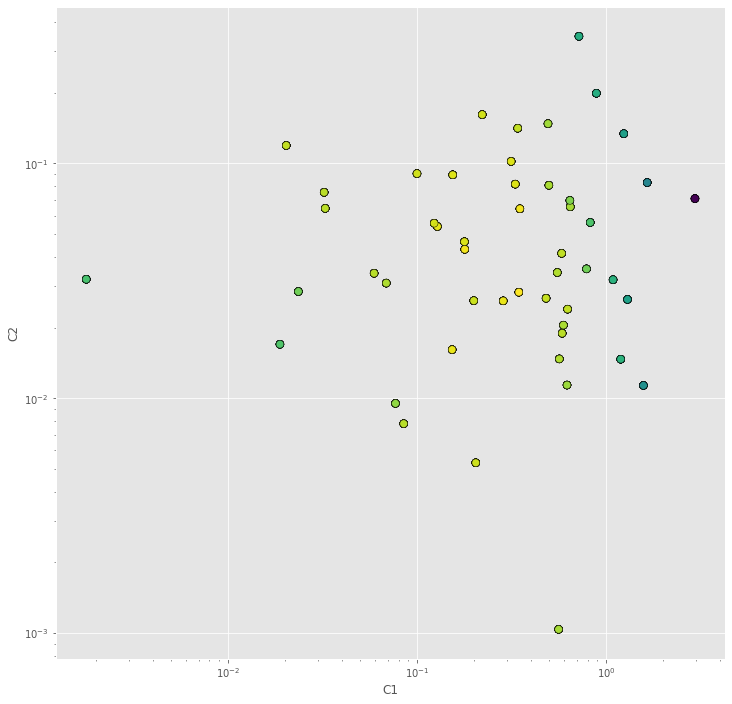

In [ ]:
import matplotlib.pyplot as plt

_x = [rs.cv_results_['param_c1'] for s in rs.cv_results_]
_y = [rs.cv_results_['param_c2'] for s in rs.cv_results_]
_c = [rs.cv_results_['mean_test_score'] for s in rs.cv_results_]

fig = plt.figure()
fig.set_size_inches(12, 12)
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('C1')
ax.set_ylabel('C2')
#ax.set_title("Randomized Hyperparameter Search CV Results (min={:0.3}, max={:0.3})".format(min(_c), max(_c)))

ax.scatter(_x, _y, c=_c, s=60, alpha=0.9, edgecolors=[0,0,0])

#print("Dark blue => {:0.4}, dark red => {:0.4}".format(min(_c), max(_c)))

In [ ]:
crf = rs.best_estimator_
y_pred = crf.predict(X_test)


In [ ]:
print(metrics.flat_classification_report(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                   precision    recall  f1-score   support

          B-ACTOR       0.89      0.92      0.90       812
      B-CHARACTER       0.72      0.49      0.58        90
       B-DIRECTOR       0.89      0.84      0.86       456
          B-GENRE       0.93      0.95      0.94      1117
           B-PLOT       0.68      0.63      0.65       491
         B-RATING       0.97      0.97      0.97       500
B-RATINGS_AVERAGE       0.93      0.87      0.90       451
         B-REVIEW       0.36      0.16      0.22        56
           B-SONG       0.64      0.52      0.57        54
          B-TITLE       0.77      0.79      0.78       562
        B-TRAILER       0.81      0.83      0.82        30
           B-YEAR       0.95      0.94      0.95       720
          I-ACTOR       0.88      0.92      0.90       862
      I-CHARACTER       0.64      0.37      0.47        75
       I-DIRECTOR       0.87      0.84      0.86       496
          I-GENRE       0.84      0.70      0.77       

In [ ]:
report=metrics.flat_classification_report(y_test, y_pred,output_dict=True)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
df_report=pd.DataFrame(report).T
df_report

,precision,recall,f1-score,support
B-ACTOR,0.889286,0.919951,0.904358,812.000000
B-CHARACTER,0.721311,0.488889,0.582781,90.000000
B-DIRECTOR,0.888889,0.842105,0.864865,456.000000
B-GENRE,0.928509,0.953447,0.940813,1117.000000
B-PLOT,0.679121,0.629328,0.653277,491.000000
B-RATING,0.973843,0.968000,0.970913,500.000000
B-RATINGS_AVERAGE,0.926887,0.871397,0.898286,451.000000
B-REVIEW,0.360000,0.160714,0.222222,56.000000
B-SONG,0.636364,0.518519,0.571429,54.000000
B-TITLE,0.766839,0.790036,0.778265,562.000000


In [ ]:
df_report.to_csv('/content/drive/My Drive/DAAN888/Results/NER_from_Scratch_MIT_Movie_Dataset.csv', index=True)

In [ ]:
eli5.show_weights(crf, top=10)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


From \ To,O,B-ACTOR,I-ACTOR,B-CHARACTER,I-CHARACTER,B-DIRECTOR,I-DIRECTOR,B-GENRE,I-GENRE,B-PLOT,I-PLOT,B-RATING,I-RATING,B-RATINGS_AVERAGE,I-RATINGS_AVERAGE,B-REVIEW,I-REVIEW,B-SONG,I-SONG,B-TITLE,I-TITLE,B-TRAILER,I-TRAILER,B-YEAR,I-YEAR
O,3.204,2.908,-4.825,2.642,-3.777,2.624,-4.061,1.84,-3.42,2.386,-6.754,1.935,-4.007,2.624,-5.558,1.981,-4.091,1.937,-4.01,3.045,-5.805,1.538,-1.633,2.281,-4.92
B-ACTOR,0.859,-2.091,8.858,0.0,0.0,0.0,-0.922,-0.503,0.0,-0.417,-1.276,0.0,0.0,0.0,-0.246,0.0,0.0,0.0,0.0,-0.337,-1.301,0.0,0.0,0.0,0.0
I-ACTOR,0.964,-1.091,4.903,0.0,-0.731,-0.495,-1.904,1.191,-0.371,1.466,-3.339,0.61,-0.702,0.528,-2.399,0.854,-0.443,0.0,-1.524,-0.948,-2.454,0.0,0.0,1.144,-1.159
B-CHARACTER,0.103,-0.708,-0.128,-0.086,6.899,0.0,-0.084,-1.532,0.0,0.398,-1.086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001,-1.473,0.0,0.0,0.0,0.0
I-CHARACTER,0.359,0.0,-0.133,-0.044,6.42,0.0,0.0,-0.241,0.0,0.86,-1.424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.811,-1.459,0.0,0.0,0.0,0.0
B-DIRECTOR,0.01,-0.822,-1.325,-0.269,-0.833,-2.391,7.769,-0.708,0.0,0.0,-1.802,-1.182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.037,-1.559,0.0,0.0,0.0,-0.036
I-DIRECTOR,1.37,-0.416,-0.574,0.0,-0.336,-0.243,5.57,1.868,0.0,0.939,-1.491,0.609,0.0,0.399,-0.94,1.042,0.0,0.0,-0.011,0.0,-1.306,0.0,0.0,1.258,0.0
B-GENRE,1.552,0.379,-0.418,0.0,0.0,0.827,-1.124,-5.171,6.46,1.891,-1.954,1.018,-0.186,1.747,-0.584,0.0,0.0,0.0,-0.679,-0.005,-1.981,-1.306,0.0,1.398,-0.169
I-GENRE,0.747,-0.027,-0.873,0.0,0.0,0.001,-0.402,-2.569,6.223,0.313,-1.933,0.0,0.0,0.0,-0.443,0.0,0.0,0.0,0.0,0.0,-1.277,0.0,0.0,1.01,0.0
B-PLOT,0.524,0.516,-1.479,0.0,-1.15,-0.015,-1.572,0.557,-1.742,-2.535,4.948,-0.118,-0.587,0.557,-1.191,-0.324,0.0,-0.509,-0.519,-1.447,-2.208,-0.033,0.0,0.0,-0.493


In [ ]:
y_pred_train = crf.predict(X_train)

In [ ]:
print(metrics.flat_classification_report(y_train, y_pred_train))

                   precision    recall  f1-score   support

          B-ACTOR       0.98      0.98      0.98      3220
      B-CHARACTER       0.95      0.90      0.92       385
       B-DIRECTOR       0.99      0.97      0.98      1720
          B-GENRE       0.97      0.98      0.98      4354
           B-PLOT       0.94      0.92      0.93      1927
         B-RATING       0.98      0.98      0.98      2007
B-RATINGS_AVERAGE       0.95      0.93      0.94      1869
         B-REVIEW       0.77      0.41      0.54       221
           B-SONG       0.94      0.84      0.89       245
          B-TITLE       0.96      0.96      0.96      2376
        B-TRAILER       0.84      0.95      0.89       113
           B-YEAR       0.98      0.97      0.97      2858
          I-ACTOR       0.98      0.98      0.98      3474
      I-CHARACTER       0.95      0.91      0.93       342
       I-DIRECTOR       0.99      0.98      0.98      1850
          I-GENRE       0.95      0.89      0.92       

In [ ]:
df_train = []

for words, labels in zip(dataset['train_tokens'],dataset['train_labels'] ):
  df_train.extend(list(zip(words, labels)))
df_train = pd.DataFrame(df_train, columns=['words', 'labels'])
df_train

,words,labels
0,what,O
1,movies,O
2,star,O
3,bruce,B-ACTOR
4,willis,I-ACTOR
...,...,...
99486,scarlett,B-CHARACTER
99487,o,I-CHARACTER
99488,hara,I-CHARACTER
99489,in,O


In [ ]:
df_test = []

for words, labels in zip(dataset['test_tokens'],dataset['test_labels'] ):
  df_test.extend(list(zip(words, labels)))
df_test = pd.DataFrame(df_test, columns=['words', 'labels'])
df_test

,words,labels
0,are,O
1,there,O
2,any,O
3,good,O
4,romantic,B-GENRE
...,...,...
24681,movie,O
24682,about,O
24683,captain,B-CHARACTER
24684,jack,I-CHARACTER


In [ ]:
df=pd.concat([df_train,df_test])
df

,words,labels
0,what,O
1,movies,O
2,star,O
3,bruce,B-ACTOR
4,willis,I-ACTOR
...,...,...
24681,movie,O
24682,about,O
24683,captain,B-CHARACTER
24684,jack,I-CHARACTER


In [ ]:
df.shape

(124177, 2)

In [ ]:
df.groupby('words').agg(['count','nunique'])

labels        
           count nunique
words                   
,              2       1
007            1       1
01             1       1
04             1       1
1              6       1
...          ...     ...
zoolander      1       1
zoom           1       1
zuccon         1       1
zwick          1       1
zydrate        1       1

[7481 rows x 2 columns]

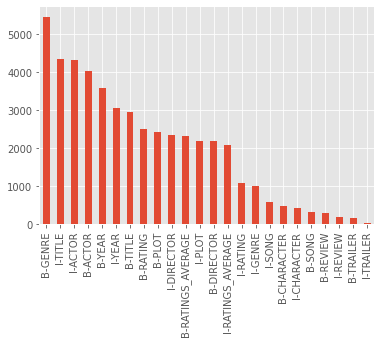

In [ ]:
df_bar=df[df['labels'] != 'O']

df_bar['labels'].value_counts().plot.bar()

In [ ]:
df['labels'].value_counts()

O                    75937
B-GENRE               5471
I-TITLE               4351
I-ACTOR               4336
B-ACTOR               4032
B-YEAR                3578
I-YEAR                3066
B-TITLE               2938
B-RATING              2507
B-PLOT                2418
I-DIRECTOR            2346
B-RATINGS_AVERAGE     2320
I-PLOT                2183
B-DIRECTOR            2176
I-RATINGS_AVERAGE     2076
I-RATING              1066
I-GENRE               1008
I-SONG                 565
B-CHARACTER            475
I-CHARACTER            417
B-SONG                 299
B-REVIEW               277
I-REVIEW               177
B-TRAILER              143
I-TRAILER               15
Name: labels, dtype: int64

In [ ]:
len(df.labels.unique())

25

In [ ]:
df.words.nunique(), df.labels.nunique()

(7481, 25)

Create a column with word length in dataframe

In [ ]:
df["words"].str.len() 

0        4
1        6
2        4
3        5
4        6
        ..
24681    5
24682    5
24683    7
24684    4
24685    7
Name: words, Length: 124177, dtype: int64

In [ ]:
df_box=df
df_box['c']=df["words"].str.len() 
df_box

,words,labels,word_length
0,what,O,4
1,movies,O,6
2,star,O,4
3,bruce,B-ACTOR,5
4,willis,I-ACTOR,6
...,...,...,...
24681,movie,O,5
24682,about,O,5
24683,captain,B-CHARACTER,7
24684,jack,I-CHARACTER,4


<Figure size 432x216 with 0 Axes>

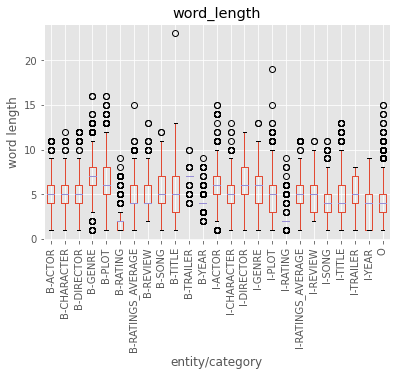

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3))
df_box.boxplot(column=['word_length'], by='labels')
plt.suptitle('')
plt.xlabel('entity/category')
plt.ylabel('word length')
plt.xticks(rotation=90)
plt.show()

In [ ]:
import scipy.stats as stats

In [ ]:
!pip install researchpy
import researchpy as rp

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
rp.summary_cont(df_box['word_length'].groupby(df_box['labels']))

,N,Mean,SD,SE,95% Conf.,Interval
labels,,,,,,
B-ACTOR,4032,5.3606,1.6036,0.0253,5.3111,5.4101
B-CHARACTER,475,5.2253,1.8309,0.0840,5.0602,5.3903
B-DIRECTOR,2176,5.3745,1.7041,0.0365,5.3029,5.4462
B-GENRE,5471,6.9450,2.1926,0.0296,6.8869,7.0031
B-PLOT,2418,6.3495,2.3443,0.0477,6.2560,6.4430
B-RATING,2507,2.0303,1.5920,0.0318,1.9680,2.0927
B-RATINGS_AVERAGE,2320,5.0142,1.8890,0.0392,4.9373,5.0911
B-REVIEW,277,5.1408,1.9219,0.1155,4.9135,5.3681
B-SONG,299,5.2876,2.6931,0.1557,4.9811,5.5941


In [ ]:
df_box[df_box['labels']=='B-RATING']

,words,labels,word_length
151,r,B-RATING,1
318,r,B-RATING,1
683,nc,B-RATING,2
735,rated,B-RATING,5
913,pg,B-RATING,2
...,...,...,...
24208,r,B-RATING,1
24223,pg,B-RATING,2
24231,pg,B-RATING,2
24263,pg,B-RATING,2


In [ ]:
df_box[df_box['labels']=='B-RATING']['words'].unique()

array(['r', 'nc', 'rated', 'pg', 'g', 'not', 'terrible', 'pg13', 'mpaa',
       'childrens', 'rating', 'family', 'x', 'p', 'tv13', 'nc17', 'tv',
       'highest', 'what', 'i', 'comedy', 'rate', 'low', 'arent',
       'unrated', '1990s'], dtype=object)

In [ ]:
df_box[df_box['labels']=='B-YEAR']['words'].unique()

array(['1980s', '1800s', '1990s', 'last', '2010s', 'new', '1970s', '2002',
       '1998', '2000s', '1996', 'year', '1990', '1991', '2011', 'latest',
       '2010', 'pg', '1992', 'first', 'since', '1993', '2012', 'before',
       'released', '1940s', '1973', '1999', '1969', 'of', '1960s',
       '1930s', '1971', '1950s', '2004', '2001s', 'come', '2003', '1997',
       '2000', 'most', 'when', 'newest', '99', '1982', '1975', '90s',
       'oldest', '70s', 'the', '2001', '1986', '60s', 'coming',
       'currently', '1967', 'what', '1995', 'this', '80s', '1930', '2005',
       '1980', '1972', '1947', '1920s', 'fourth', '1945', 'premiere',
       '1988', '50s', '1989', '2007', '2006', '1941', '1977', '40', '20s',
       '1981', 'march', '1965', 'after', 'recent', '2009', '1985', '2008',
       '1958', '1939', 'late', '1940', 'original', 'all', '1994', 'out',
       '1984', '1979', '1950', '1943', '1968', '1900s', 'prequel', '1944',
       'second', 'in', 'old', 'fist', 'show', 'between', '19

In [ ]:
df_box[df_box['words']=='sholder']  # could be Director Jack Sholder

,words,labels,word_length
24075,sholder,I-DIRECTOR,7


In [ ]:
df_box[df_box['words']=='jack']

,words,labels,word_length
383,jack,B-ACTOR,4
4973,jack,B-CHARACTER,4
5871,jack,B-CHARACTER,4
9130,jack,B-CHARACTER,4
9377,jack,B-ACTOR,4
9481,jack,B-ACTOR,4
12319,jack,B-CHARACTER,4
13184,jack,B-CHARACTER,4
14744,jack,B-CHARACTER,4
14757,jack,B-ACTOR,4


[array([ 9, 11,  9, ..., 10,  9,  9])]

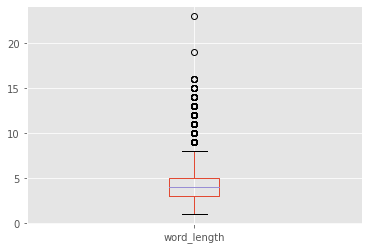

In [ ]:
_, bp=pd.DataFrame.boxplot(df_box, column=['word_length'], return_type='both')
outliers=[flier.get_ydata() for flier in bp["fliers"]]
outliers

In [ ]:
df['labels'].unique()

array(['O', 'B-ACTOR', 'I-ACTOR', 'B-YEAR', 'B-TITLE', 'B-GENRE',
       'I-GENRE', 'B-DIRECTOR', 'I-DIRECTOR', 'B-SONG', 'I-SONG',
       'B-PLOT', 'I-PLOT', 'B-REVIEW', 'B-CHARACTER', 'I-CHARACTER',
       'B-RATING', 'B-RATINGS_AVERAGE', 'I-RATINGS_AVERAGE', 'I-TITLE',
       'I-RATING', 'B-TRAILER', 'I-TRAILER', 'I-REVIEW', 'I-YEAR'],
      dtype=object)

In [ ]:
df["words"]

0           what
1         movies
2           star
3          bruce
4         willis
          ...   
24681      movie
24682      about
24683    captain
24684       jack
24685    sparrow
Name: words, Length: 124177, dtype: object

O                    75937
B-GENRE               5471
I-TITLE               4351
I-ACTOR               4336
B-ACTOR               4032
B-YEAR                3578
I-YEAR                3066
B-TITLE               2938
B-RATING              2507
B-PLOT                2418
I-DIRECTOR            2346
B-RATINGS_AVERAGE     2320
I-PLOT                2183
B-DIRECTOR            2176
I-RATINGS_AVERAGE     2076
I-RATING              1066
I-GENRE               1008
I-SONG                 565
B-CHARACTER            475
I-CHARACTER            417
B-SONG                 299
B-REVIEW               277
I-REVIEW               177
B-TRAILER              143
I-TRAILER               15

In [ ]:
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
import matplotlib
import matplotlib.pyplot as pyplot
import nltk
import nltk.data
import numba
import numpy
import pandas
import seaborn

In [ ]:
from nltk.corpus import words
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
correct_spellings = words.words()
spellings_series = pandas.Series(correct_spellings)
from nltk.metrics.distance import (
    edit_distance,
    jaccard_distance,
    )
from nltk.util import ngrams

Spell check?

In [ ]:
df["words"].unique()

array(['what', 'movies', 'star', ..., 'bailiff', 'blossoms', 'freaks'],
      dtype=object)

In [ ]:
len(df["words"].unique())

7481

Very slow due to for loop:

In [ ]:
def answer_eleven(entries=df["words"][0:10]):
    """gets the nearest words based on Levenshtein distance

    Args:
     entries (list[str]): words to find closest words to

    Returns:
     list[str]: nearest words to the entries
    """
    outcomes = []
    for entry in entries:
        distances = ((edit_distance(entry,
                                    word), word)
                     for word in correct_spellings)
        closest = min(distances)
        outcomes.append(closest[1])
    return outcomes

#print(answer_eleven())

In [ ]:

df_spell_check = pd.DataFrame(answer_eleven()) 


In [ ]:
df["words"][0:10]

0      what
1    movies
2      star
3     bruce
4    willis
5      show
6        me
7     films
8      with
9      drew
Name: words, dtype: object

In [ ]:
df_spell_check.columns=['checked']
df_spell_check

,checked
0,what
1,movie
2,star
3,Bruce
4,willie
5,show
6,me
7,film
8,with
9,drew


In [ ]:
df_comparison=pd.concat([df["words"][0:100], df_spell_check], axis=1)
df_comparison
new=df_comparison['words'] == df_comparison['checked']
df_comparison['boolean']=new
df_comparison

,words,checked,boolean
0,what,what,True
1,movies,movie,False
2,star,star,True
3,bruce,Bruce,False
4,willis,willie,False
5,show,show,True
6,me,me,True
7,films,film,False
8,with,with,True
9,drew,drew,True


In [ ]:
df_comparison[df_comparison['boolean']==False] # all names in MIT movie dataset are already lower case

,words,checked,boolean
1,movies,movie,False
3,bruce,Bruce,False
4,willis,willie,False
7,films,film,False
10,barrymore,NaN,False
11,from,NaN,False
12,the,NaN,False
13,1980s,NaN,False
14,what,NaN,False
15,movies,NaN,False


After:
https://necromuralist.github.io/data_science/posts/assignment-2-introduction-to-nltk/

There must be a better spell checker?

In [ ]:
!sudo apt-get install libhunspell-dev
!pip install hunspell

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  dictionaries-common emacsen-common hunspell-en-us libhunspell-1.6-0
  libtext-iconv-perl
Suggested packages:
  ispell | aspell | hunspell wordlist hunspell openoffice.org-hunspell
  | openoffice.org-core
The following NEW packages will be installed:
  dictionaries-common emacsen-common hunspell-en-us libhunspell-1.6-0
  libhunspell-dev libtext-iconv-perl
0 upgraded, 6 newly installed, 0 to remove and 22 not upgraded.
Need to get 738 kB of archives.
After this operation, 2,935 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libtext-iconv-perl amd64 1.7-5build6 [13.0 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 emacsen-common all 2.0.8 [17.6 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 dictionaries-common all 1.27.2 [186 kB]
Get:4 http://archive.ubuntu.com/u

In [ ]:
import hunspell

In [ ]:
hobj=hunspell.HunSpell('/usr/share/hunspell/en_US.dic', '/usr/share/hunspell/en_US.aff')
hobj.spell('what')

True

In [ ]:
df_unique=df["words"].unique()
type(df_unique)


numpy.ndarray

In [ ]:
df_unique=pd.DataFrame(df_unique)
df_unique.columns=['words']
df_unique

,words
0,what
1,movies
2,star
3,bruce
4,willis
...,...
7476,boulevard
7477,sansho
7478,bailiff
7479,blossoms


In [ ]:
df_unique ['boolean']=df_unique['words'].apply(hobj.spell)
df_unique

,words,boolean
0,what,True
1,movies,True
2,star,True
3,bruce,False
4,willis,False
...,...,...
7476,boulevard,True
7477,sansho,False
7478,bailiff,True
7479,blossoms,True


In [ ]:
sum(df_unique['boolean']) # found in dictionary

4013

In [ ]:
-sum(df_unique['boolean']-1) # not found in dictionary

3468

In [ ]:
df_unique['boolean'][7477]

False

In [ ]:
df_unique[df_unique['boolean']==False]

,words,boolean
3,bruce,False
4,willis,False
10,barrymore,False
13,1980s,False
16,al,False
...,...,...
7458,carraiges,False
7460,sholder,False
7462,imdb,False
7470,oharu,False


In [ ]:
def jaccard(entries, gram_number):
    """find the closet words to each entry

    Args:
     entries: collection of words to match
     gram_number: number of n-grams to use

    Returns:
     list: words with the closest jaccard distance to entries
    """
    outcomes = []
    for entry in entries:
        spellings = spellings_series[spellings_series.str.startswith(entry[0])]
        distances = ((jaccard_distance(set(ngrams(entry, gram_number)),
                                       set(ngrams(word, gram_number))), word)
                     for word in spellings)
        closest = min(distances)
        outcomes.append(closest[1])
    return outcomes

In [ ]:
def answer_nine(entries=df["words"][1:10]):
    """finds the closest word based on jaccard distance"""
    return jaccard(entries, 1)

print(answer_nine())

['mismove', 'sart', 'barbecue', 'wassail', 'show', 'me', 'falsism', 'whit', 'deerweed']


In [ ]:
def answer_ten(entries=df["words"][1:10]):
    """gets the neares words using jaccard-distance with 4-grams

    Args:
     entries (list): words to find nearest other word for

    Returns:
     list: nearest words found
    """
    return jaccard(entries, 1)

print(answer_ten())

['mismove', 'sart', 'barbecue', 'wassail', 'show', 'me', 'falsism', 'whit', 'deerweed']


In [ ]:
df_first=dataset_as_df5
df_second=dataset_as_df25
df_appended=df_first.append(df_second)
len(df_appended)

124177

Tokenize

In [ ]:
MIT=" ".join(df_appended.words.str.lower().values)
# apply nltk functions, e.g. frequencies

MIT

import nltk
from nltk.probability import FreqDist
data_exploration=nltk.FreqDist(MIT)

from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer(r'\w+')
MIT_tokens=tokenizer.tokenize(MIT)

MIT_tokens

['what',
 'movies',
 'star',
 'bruce',
 'willis',
 'show',
 'me',
 'films',
 'with',
 'drew',
 'barrymore',
 'from',
 'the',
 '1980s',
 'what',
 'movies',
 'starred',
 'both',
 'al',
 'pacino',
 'and',
 'robert',
 'deniro',
 'find',
 'me',
 'all',
 'of',
 'the',
 'movies',
 'that',
 'starred',
 'harold',
 'ramis',
 'and',
 'bill',
 'murray',
 'find',
 'me',
 'a',
 'movie',
 'with',
 'a',
 'quote',
 'about',
 'baseball',
 'in',
 'it',
 'what',
 'movies',
 'have',
 'mississippi',
 'in',
 'the',
 'title',
 'show',
 'me',
 'science',
 'fiction',
 'films',
 'directed',
 'by',
 'steven',
 'spielberg',
 'do',
 'you',
 'have',
 'any',
 'thrillers',
 'directed',
 'by',
 'sofia',
 'coppola',
 'what',
 'leonard',
 'cohen',
 'songs',
 'have',
 'been',
 'used',
 'in',
 'a',
 'movie',
 'show',
 'me',
 'films',
 'elvis',
 'films',
 'set',
 'in',
 'hawaii',
 'what',
 'movie',
 'is',
 'references',
 'zydrate',
 'are',
 'there',
 'any',
 'musical',
 'films',
 'with',
 'patrick',
 'dempsey',
 'list',
 'w

In [ ]:
len(MIT_tokens)

124175

In [ ]:
print(set(MIT_tokens))
print(len(set(MIT_tokens)))

{'azzopardi', 'speedway', 'gibson', 'alienation', 'weaver', 'butler', 'boxing', 'mohr', 'rhythm', 'gonzalez', 'bronson', 'kieran', 'williams', 'fairies', 'twin', 'harry', 'wen', 'neretva', 'merry', '5', 'pregnancy', 'mcneil', 'pavlovich', 'jeremy', 'chance', 'wjat', 'couffer', 'darryl', 'ryans', 'review', 'blading', 'silkwood', 'ritchies', 'penguins', 'afterlife', 'bergman', 'simple', 'sparrow', 'lord', 'kostas', 'gathering', 'dealers', 'sang', 'berenger', 'terrorism', 'rubin', 'score', 'tyson', 'heredity', 'on', 'jay', 'lorax', 'jaglom', 'mimi', 'riches', 'wwii', 'basic', 'peck', 'brewster', 'heroes', 'warren', 'cary', 'woman', 'buried', 'mountain', 'decoding', 'ratatouille', 'ving', 'elliot', 'd', 'december', 'battle', 'topping', 'rosson', 'aguirre', 'waterfall', 'bieber', 'dawn', 'portrays', 'lebowski', 'vittoria', 'toys', 'imposter', 'pocohontas', 'excalibur', 'lynda', 'bender', 'rutger', 'avant', 'christina', 'carney', 'gavin', 'blazing', 'loves', 'castle', 'byington', 'sullivan',

In [ ]:
data_exploration=nltk.FreqDist(MIT_tokens)

type(data_exploration)

data_exploration

FreqDist({'what': 3690,
          'movies': 2151,
          'star': 387,
          'bruce': 43,
          'willis': 27,
          'show': 748,
          'me': 1190,
          'films': 646,
          'with': 1591,
          'drew': 14,
          'barrymore': 10,
          'from': 1126,
          'the': 6659,
          '1980s': 94,
          'starred': 313,
          'both': 14,
          'al': 26,
          'pacino': 18,
          'and': 994,
          'robert': 116,
          'deniro': 14,
          'find': 1016,
          'all': 335,
          'of': 1754,
          'that': 2051,
          'harold': 5,
          'ramis': 2,
          'bill': 39,
          'murray': 16,
          'a': 5240,
          'movie': 4391,
          'quote': 60,
          'about': 1487,
          'baseball': 12,
          'in': 3479,
          'it': 248,
          'have': 411,
          'mississippi': 3,
          'title': 166,
          'science': 209,
          'fiction': 210,
          'directed': 1400,
    

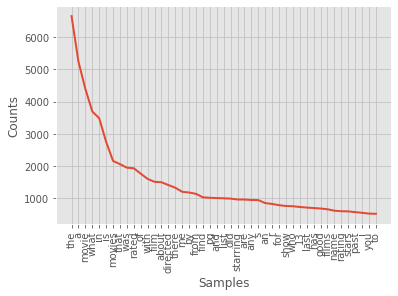

In [ ]:
data_exploration.plot(45, cumulative=False)

In [ ]:
data_exploration.most_common(10) # most common

[('the', 6659),
 ('a', 5240),
 ('movie', 4391),
 ('what', 3690),
 ('in', 3479),
 ('is', 2745),
 ('movies', 2151),
 ('that', 2051),
 ('was', 1941),
 ('rated', 1923)]

In [ ]:
FreqDist(dict(data_exploration.most_common()[-20:])) # least common

FreqDist({'bailiff': 1,
          'blogs': 1,
          'blossoms': 1,
          'boulevard': 1,
          'casts': 1,
          'com': 1,
          'crouching': 1,
          'dwarfs': 1,
          'fellowship': 1,
          'freaks': 1,
          'imdb': 1,
          'leopard': 1,
          'oharu': 1,
          'sansho': 1,
          'send': 1,
          'snow': 1,
          'somebody': 1,
          'strikes': 1,
          'sung': 1,
          'user': 1})

In [ ]:
import nltk
from nltk.util import ngrams
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from nltk.collocations import TrigramCollocationFinder
from nltk.metrics import TrigramAssocMeasures

In [ ]:
word_fd=nltk.FreqDist(MIT_tokens)
word_fd

FreqDist({'what': 3690,
          'movies': 2151,
          'star': 387,
          'bruce': 43,
          'willis': 27,
          'show': 748,
          'me': 1190,
          'films': 646,
          'with': 1591,
          'drew': 14,
          'barrymore': 10,
          'from': 1126,
          'the': 6659,
          '1980s': 94,
          'starred': 313,
          'both': 14,
          'al': 26,
          'pacino': 18,
          'and': 994,
          'robert': 116,
          'deniro': 14,
          'find': 1016,
          'all': 335,
          'of': 1754,
          'that': 2051,
          'harold': 5,
          'ramis': 2,
          'bill': 39,
          'murray': 16,
          'a': 5240,
          'movie': 4391,
          'quote': 60,
          'about': 1487,
          'baseball': 12,
          'in': 3479,
          'it': 248,
          'have': 411,
          'mississippi': 3,
          'title': 166,
          'science': 209,
          'fiction': 210,
          'directed': 1400,
    

In [ ]:
bigram_fd=nltk.FreqDist(nltk.bigrams(MIT_tokens))

In [ ]:
bigram_fd.most_common()

[(('in', 'the'), 1458),
 (('what', 'is'), 1179),
 (('directed', 'by'), 895),
 (('is', 'there'), 774),
 (('is', 'the'), 758),
 (('from', 'the'), 727),
 (('pg', '13'), 712),
 (('the', 'movie'), 705),
 (('show', 'me'), 690),
 (('there', 'a'), 678),
 (('the', 'last'), 613),
 (('a', 'movie'), 584),
 (('of', 'the'), 572),
 (('the', 'past'), 537),
 (('movie', 'with'), 523),
 (('movie', 'about'), 447),
 (('r', 'rated'), 443),
 (('is', 'a'), 432),
 (('that', 'was'), 425),
 (('me', 'a'), 424),
 (('movie', 'that'), 423),
 (('there', 'any'), 406),
 (('was', 'the'), 406),
 (('find', 'a'), 382),
 (('what', 'was'), 378),
 (('are', 'there'), 367),
 (('list', 'a'), 340),
 (('what', 'are'), 328),
 (('looking', 'for'), 318),
 (('about', 'a'), 315),
 (('rated', 'r'), 303),
 (('movie', 'starring'), 302),
 (('rated', 'pg'), 288),
 (('in', 'a'), 281),
 (('with', 'a'), 278),
 (('a', 'good'), 277),
 (('find', 'me'), 262),
 (('me', 'the'), 258),
 (('who', 'directed'), 256),
 (('a', 'pg'), 246),
 (('for', 'a'), 

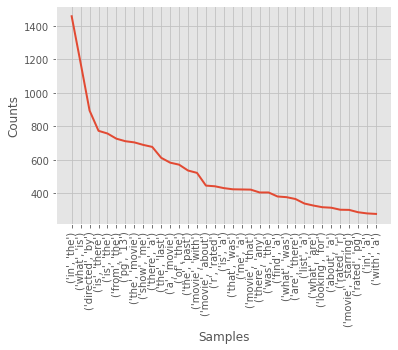

In [ ]:
bigram_fd.plot(35, cumulative=False)

In [ ]:
trigram_fd=nltk.FreqDist(nltk.trigrams(MIT_tokens))

In [ ]:
trigram_fd.most_common()

[(('what', 'is', 'the'), 617),
 (('is', 'there', 'a'), 610),
 (('what', 'is', 'a'), 390),
 (('in', 'the', 'past'), 312),
 (('are', 'there', 'any'), 311),
 (('in', 'the', 'last'), 289),
 (('what', 'was', 'the'), 272),
 (('show', 'me', 'a'), 268),
 (('the', 'name', 'of'), 226),
 (('what', 'are', 'some'), 214),
 (('rated', 'pg', '13'), 193),
 (('looking', 'for', 'a'), 182),
 (('made', 'in', 'the'), 172),
 (('a', 'pg', '13'), 171),
 (('was', 'directed', 'by'), 166),
 (('came', 'out', 'in'), 158),
 (('movie', 'directed', 'by'), 155),
 (('do', 'you', 'have'), 148),
 (('show', 'me', 'the'), 147),
 (('a', 'list', 'of'), 138),
 (('name', 'of', 'the'), 137),
 (('me', 'a', 'movie'), 135),
 (('im', 'looking', 'for'), 134),
 (('that', 'came', 'out'), 133),
 (('from', 'the', 'past'), 131),
 (('a', 'movie', 'with'), 127),
 (('released', 'in', 'the'), 126),
 (('is', 'the', 'movie'), 125),
 (('movies', 'from', 'the'), 124),
 (('movie', 'from', 'the'), 122),
 (('movie', 'about', 'a'), 120),
 (('is', 'th

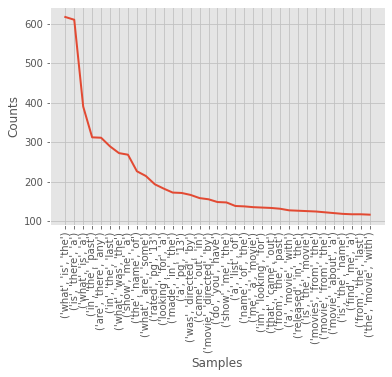

In [ ]:
trigram_fd.plot(35, cumulative=False)

In [ ]:
import nltk
nltk.download('punkt')
from nltk.util import ngrams

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def extract_ngrams(data, num):
  n_grams=ngrams(nltk.word_tokenize(data), num)
  return [' '.join(grams) for grams in n_grams]
data=' what is the what is the what is the most'

data_exploration2=nltk.FreqDist(extract_ngrams(MIT,5))

type(data_exploration2)

data_exploration2.most_common(50)

[('what is the name of', 117),
 ('is the name of the', 72),
 ('what is the title of', 61),
 ('that came out in the', 61),
 ('what was the name of', 53),
 ('show me a list of', 50),
 ('i am looking for a', 49),
 ('that was made in the', 45),
 ('about what is the movie', 45),
 ('the movie with the song', 40),
 ('what is the plot of', 40),
 ('show me a movie with', 39),
 ('was the name of the', 32),
 ('the name of the movie', 32),
 ('came out in the last', 32),
 ('is the title of the', 29),
 ('that is rated pg 13', 29),
 ('is there a movie called', 29),
 ('with an average rating of', 28),
 ('find me the movie with', 27),
 ('me the movie with the', 27),
 ('that was liked a lot', 27),
 ('is the name of a', 26),
 ('came out in the past', 26),
 ('an average rating of six', 25),
 ('come out what year did', 24),
 ('a movie with the song', 23),
 ('in the last seven years', 23),
 ('in the past seven decades', 23),
 ('the plot of the movie', 23),
 ('find me a movie with', 22),
 ('me a movie with t

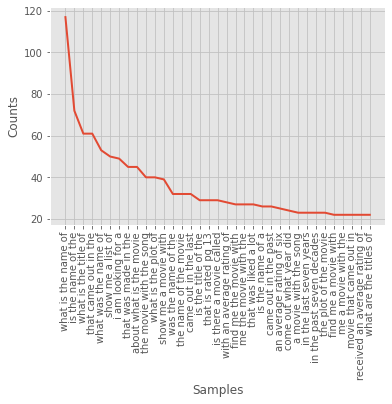

In [ ]:
data_exploration2.plot(35, cumulative=False)

In [ ]:
#tokenizes the file 
#tokens = word_tokenize(raw)
tokensNLTK = MIT_tokens

#calculates the FreqDist of all words - all words in lower case
freq_list = FreqDist([w.lower() for w in tokensNLTK]).most_common()

#Data for X- and Y-Axis plot
values=[]
values2=[]
for item in (freq_list):
    value = (list(item)[1]) / len([w.lower() for w in tokensNLTK])
    values.append(value)
    value2 = (list(item)[1])
    values2.append(value2)

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt
#graph of counted frequencies gets plotted
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Rank of word, with most common ranked first')
plt.ylabel('Frequency of each word / total number of words')
plt.plot(np.array(list(range(1, (len(values)+1)))), np.array(values))

#graph of optimal zipf distribution is plotted
optimal_zipf = 1/(np.array(list(range(1, (len(values)+1))))* np.log(1.78*len(values)))###1.78
plt.plot(np.array(list(range(1, (len(values)+1)))), optimal_zipf)
plt.show()

In [ ]:
len(values)

In [ ]:
from scipy.optimize import minimize
freqs=np.array(values2)
x=np.array(list(range(1, (len(values)+1))))

f,ax = plt.subplots()
ax.plot(x, freqs, 'o')
ax.set_xscale("log")
ax.set_yscale("log")

def loglik(b):  
    # Power law function
    Probabilities = x**(-b)

    # Normalized
    Probabilities = Probabilities/Probabilities.sum()

    # Log Likelihoood
    Lvector = np.log(Probabilities)

    # Multiply the vector by frequencies
    Lvector = np.log(Probabilities) * freqs

    # LL is the sum
    L = Lvector.sum()

    # We want to maximize LogLikelihood or minimize (-1)*LogLikelihood
    return(-L)

s_best = minimize(loglik, [2])
print(s_best)
ax.plot(x, freqs[0]*x**-s_best.x)